# Consistent Energy Debt: America’s Unequal Power Grid
 Project by Emma Delehanty, Mukila Rajasekar, John Tomaselli

### Data Source:
https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48

### Project Overview:
We are conducting an exploration of the United States’ electric grid in order to determine areas that would most benefit from additional power generation sources.  Our intermediate goal is to determine which balancing authorities, who manage power transportation, and power regions, which in turn manage balancing authorities, import electricity on a periodic basis.  Other goals include studying how energy production and demand fluctuate as well as which energy production sources support different balancing authorities.  Time permitting, we would also like to suggest select renewable energy sources for underperforming balancing authorities.

## Importing the packages
There are different packages needed for this project like Numpy, Matplotlib, Datetime and Pandas to do data exploration and analysis. We use Seaborn and Cartopy for visualization.

In [1]:
#Importing the packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import re
import datetime
import seaborn as sns
sns.set()

### Reading Data Set

In [3]:
#Importing the datasets
electricity1= pd.read_csv("EIA930_BALANCE_2019_Jan_Jun.csv")
electricity2= pd.read_csv("EIA930_BALANCE_2019_Jul_Dec.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,15,16,17,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Combining the two datasets into one

In [4]:
#Concatinating both the datasets
electricity =pd.concat([electricity1,electricity2])
electricity.fillna(0) ## fillna with 0

Balancing Authority   Data Date  Hour Number Local Time at End of Hour  \
0                      AEC  01/01/2019            1     01/01/2019 1:00:00 AM   
1                      AEC  01/01/2019            2     01/01/2019 2:00:00 AM   
2                      AEC  01/01/2019            3     01/01/2019 3:00:00 AM   
3                      AEC  01/01/2019            4     01/01/2019 4:00:00 AM   
4                      AEC  01/01/2019            5     01/01/2019 5:00:00 AM   
5                      AEC  01/01/2019            6     01/01/2019 6:00:00 AM   
6                      AEC  01/01/2019            7     01/01/2019 7:00:00 AM   
7                      AEC  01/01/2019            8     01/01/2019 8:00:00 AM   
8                      AEC  01/01/2019            9     01/01/2019 9:00:00 AM   
9                      AEC  01/01/2019           10    01/01/2019 10:00:00 AM   
10                     AEC  01/01/2019           11    01/01/2019 11:00:00 AM   
11                     AEC  01/01/2019           12    01/01/2019 12:00:00 PM   
12                     AEC  01/01/2019           13     01/01/2019 1:00:00 PM   
13                     AEC  01/01/2019           14     01/01/2019 2:00:00 PM   
14                     AEC  01/01/2019           15     01/01/2019 3:00:00 PM   
15                     AEC  01/01/2019           16     01/01/2019 4:00:00 PM   
16                     AEC  01/01/2019           17     01/01/2019 5:00:00 PM   
17                     AEC  01/01/2019           18     01/01/2019 6:00:00 PM   
18                     AEC  01/01/2019           19     01/01/2019 7:00:00 PM   
19                     AEC  01/01/2019           20     01/01/2019 8:00:00 PM   
20                     AEC  01/01/2019           21     01/01/2019 9:00:00 PM   
21                     AEC  01/01/2019           22    01/01/2019 10:00:00 PM   
22                     AEC  01/01/2019           23    01/01/2019 11:00:00 PM   
23                     AEC  01/01/2019           24    01/02/2019 12:00:00 AM   
24                     AEC  01/02/2019            1     01/02/2019 1:00:00 AM   
25                     AEC  01/02/2019            2     01/02/2019 2:00:00 AM   
26                     AEC  01/02/2019            3     01/02/2019 3:00:00 AM   
27                     AEC  01/02/2019            4     01/02/2019 4:00:00 AM   
28                     AEC  01/02/2019            5     01/02/2019 5:00:00 AM   
29                     AEC  01/02/2019            6     01/02/2019 6:00:00 AM   
...                    ...         ...          ...                       ...   
186930                 YAD  10/26/2019           19     10/26/2019 7:00:00 PM   
186931                 YAD  10/26/2019           20     10/26/2019 8:00:00 PM   
186932                 YAD  10/26/2019           21     10/26/2019 9:00:00 PM   
186933                 YAD  10/26/2019           22    10/26/2019 10:00:00 PM   
186934                 YAD  10/26/2019           23    10/26/2019 11:00:00 PM   
186935                 YAD  10/26/2019           24    10/27/2019 12:00:00 AM   
186936                 YAD  10/27/2019            1     10/27/2019 1:00:00 AM   
186937                 YAD  10/27/2019            2     10/27/2019 2:00:00 AM   
186938                 YAD  10/27/2019            3     10/27/2019 3:00:00 AM   
186939                 YAD  10/27/2019            4     10/27/2019 4:00:00 AM   
186940                 YAD  10/27/2019            5     10/27/2019 5:00:00 AM   
186941                 YAD  10/27/2019            6     10/27/2019 6:00:00 AM   
186942                 YAD  10/27/2019            7     10/27/2019 7:00:00 AM   
186943                 YAD  10/27/2019            8     10/27/2019 8:00:00 AM   
186944                 YAD  10/27/2019            9     10/27/2019 9:00:00 AM   
186945                 YAD  10/27/2019           10    10/27/2019 10:00:00 AM   
186946                 YAD  10/27/2019           11    10/27/2019 11:00:00 AM   
186947                 YAD  10/27/2019

The dataset contains 470827 rows and 23 columns in total.
#### Definitions for some of the important variables in the dataset

##### Balancing Authority 
Entities responsible for balancing electricity supply, demand, and interchange on their electric system in real-time. Mixture of singular power generation sources and cooperatives. 

##### Net Generation 
The metered output of electric generating units in the balancing authority’s electric system. This generation only includes generating units that are managed by the balancing authority or whose operations are visible to the balancing authority. Independent power generation operations not consistently connected to the wider power grid are not included. 

##### Interchange 
The net metered tie line flow from one BA to another directly interconnected BA. Total net interchange is the net sum of all interchange occurring between a BA and its directly interconnected neighboring BAs.
Negative interchange values = net inflows.
Positive interchange values = net outflows.

##### Demand
The amount of electricity load within the balancing authority’s electric system.
Net generation minus total interchange (typically).

#### Issues with the dataset

##### Some time periods with no data provided.
Mostly due to regulatory exceptions. 
Filtered out of calculated means by default (i.e., NaN not counted). 
Full set of statistics only started in 2019.

##### Very irregular balancing authority and region boundaries.
No precise mapping of where balancing authority boundaries.
Restricted us from more generally applying positional data (I.e., zip codes, lat/long, etc.)

##### Includes generation-only balancing authorities
These balancing authorities consist of a power plant or group of power plants and do not directly serve retail customers.


## Cleaning the dataset
Some of the columns in the dataset have non alphanumeric characters like ':' and ',' which must be removed and all the numeric columns must be checked to make sure they are all of type 'float'. 

First, we need to correct the data type of each variable. Total Interchange, Demand, and Net Generation, amongst other important variables, are objects, not numeric types. We will reset the data set in order to most conveniently align all variables with the necessary data type for future calculations. 

In [5]:
# Putting all the columns that have numeric entries into a list. 
num_var = ['Hour Number','Demand Forecast (MW)', 'Demand (MW)', 'Net Generation (MW)', 'Total Interchange (MW)', 
 'Sum(Valid DIBAs) (MW)', 'Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)', 'Demand (MW) (Adjusted)', 
 'Net Generation (MW) (Adjusted)', 'Net Generation (MW) from Coal', 'Net Generation (MW) from Natural Gas', 
 'Net Generation (MW) from Nuclear', 'Net Generation (MW) from All Petroleum Products', 
 'Net Generation (MW) from Hydropower and Pumped Storage', 'Net Generation (MW) from Solar', 
 'Net Generation (MW) from Wind', 'Net Generation (MW) from Other Fuel Sources', 
 'Net Generation (MW) from Unknown Fuel Sources']

# Ensuring all numeric entries are floats (for future calculations) and removing any non-numeric symbols. 
for i in num_var:
    electricity[i] = electricity[i].astype(str)
    electricity[i] = electricity[i].replace({',':''}, regex=True)
    electricity[i] = electricity[i].astype(float)

As seen below, now all needed data types are floats. 

In [114]:
 electricity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469267 entries, 0 to 186959
Data columns (total 28 columns):
Balancing Authority                                       469267 non-null object
Data Date                                                 469267 non-null datetime64[ns]
Hour Number                                               469267 non-null float64
Local Time at End of Hour                                 469267 non-null object
UTC Time at End of Hour                                   469267 non-null object
Demand Forecast (MW)                                      387591 non-null float64
Demand (MW)                                               386823 non-null float64
Net Generation (MW)                                       457575 non-null float64
Total Interchange (MW)                                    457503 non-null float64
Sum(Valid DIBAs) (MW)                                     452883 non-null float64
Demand (MW) (Imputed)                                     6893 no

## Data exploration
Before doing any analysis on the data, we need to learn more about the dataset.

First, let us look at our primary variable, Balancing Authority..

In [7]:
electricity['Balancing Authority'].unique()  ## get all the name Balancing Authority name

array(['AEC', 'AECI', 'AVA', 'AVRN', 'AZPS', 'BANC', 'BPAT', 'CHPD',
       'CISO', 'CPLE', 'CPLW', 'DEAA', 'DOPD', 'DUK', 'EEI', 'EPE',
       'ERCO', 'FMPP', 'FPC', 'FPL', 'GCPD', 'GRID', 'GRIF', 'GVL', 'GWA',
       'HGMA', 'HST', 'IID', 'IPCO', 'ISNE', 'JEA', 'LDWP', 'LGEE',
       'MISO', 'NEVP', 'NSB', 'NWMT', 'NYIS', 'PACE', 'PACW', 'PGE',
       'PJM', 'PNM', 'PSCO', 'PSEI', 'SC', 'SCEG', 'SCL', 'SEC', 'SEPA',
       'SOCO', 'SPA', 'SRP', 'SWPP', 'TAL', 'TEC', 'TEPC', 'TIDC', 'TPWR',
       'TVA', 'WACM', 'WALC', 'WAUW', 'WWA', 'YAD'], dtype=object)

In [8]:
#Total no. of balancing authorities = 65
electricity['Balancing Authority'].nunique()

65

#### Group date to weekdays ,months and quarter and create new column

In [12]:
electricity['Data Date']=pd.to_datetime(electricity['Data Date'])
electricity['day_of_week']=electricity['Data Date'].dt.weekday_name
electricity['monthly']=pd.PeriodIndex(electricity['Data Date'],freq='M')
electricity['quarter']=pd.PeriodIndex(electricity['Data Date'],freq='Q')
electricity.rename(columns={'Total Interchange (MW)':'tinterchange'},inplace=True) ## rename the column for later caculation
electricity

Balancing Authority  Data Date  Hour Number Local Time at End of Hour  \
0                      AEC 2019-01-01          1.0     01/01/2019 1:00:00 AM   
1                      AEC 2019-01-01          2.0     01/01/2019 2:00:00 AM   
2                      AEC 2019-01-01          3.0     01/01/2019 3:00:00 AM   
3                      AEC 2019-01-01          4.0     01/01/2019 4:00:00 AM   
4                      AEC 2019-01-01          5.0     01/01/2019 5:00:00 AM   
5                      AEC 2019-01-01          6.0     01/01/2019 6:00:00 AM   
6                      AEC 2019-01-01          7.0     01/01/2019 7:00:00 AM   
7                      AEC 2019-01-01          8.0     01/01/2019 8:00:00 AM   
8                      AEC 2019-01-01          9.0     01/01/2019 9:00:00 AM   
9                      AEC 2019-01-01         10.0    01/01/2019 10:00:00 AM   
10                     AEC 2019-01-01         11.0    01/01/2019 11:00:00 AM   
11                     AEC 2019-01-01         12.0    01/01/2019 12:00:00 PM   
12                     AEC 2019-01-01         13.0     01/01/2019 1:00:00 PM   
13                     AEC 2019-01-01         14.0     01/01/2019 2:00:00 PM   
14                     AEC 2019-01-01         15.0     01/01/2019 3:00:00 PM   
15                     AEC 2019-01-01         16.0     01/01/2019 4:00:00 PM   
16                     AEC 2019-01-01         17.0     01/01/2019 5:00:00 PM   
17                     AEC 2019-01-01         18.0     01/01/2019 6:00:00 PM   
18                     AEC 2019-01-01         19.0     01/01/2019 7:00:00 PM   
19                     AEC 2019-01-01         20.0     01/01/2019 8:00:00 PM   
20                     AEC 2019-01-01         21.0     01/01/2019 9:00:00 PM   
21                     AEC 2019-01-01         22.0    01/01/2019 10:00:00 PM   
22                     AEC 2019-01-01         23.0    01/01/2019 11:00:00 PM   
23                     AEC 2019-01-01         24.0    01/02/2019 12:00:00 AM   
24                     AEC 2019-01-02          1.0     01/02/2019 1:00:00 AM   
25                     AEC 2019-01-02          2.0     01/02/2019 2:00:00 AM   
26                     AEC 2019-01-02          3.0     01/02/2019 3:00:00 AM   
27                     AEC 2019-01-02          4.0     01/02/2019 4:00:00 AM   
28                     AEC 2019-01-02          5.0     01/02/2019 5:00:00 AM   
29                     AEC 2019-01-02          6.0     01/02/2019 6:00:00 AM   
...                    ...        ...          ...                       ...   
186930                 YAD 2019-10-26         19.0     10/26/2019 7:00:00 PM   
186931                 YAD 2019-10-26         20.0     10/26/2019 8:00:00 PM   
186932                 YAD 2019-10-26         21.0     10/26/2019 9:00:00 PM   
186933                 YAD 2019-10-26         22.0    10/26/2019 10:00:00 PM   
186934                 YAD 2019-10-26         23.0    10/26/2019 11:00:00 PM   
186935                 YAD 2019-10-26         24.0    10/27/2019 12:00:00 AM   
186936                 YAD 2019-10-27          1.0     10/27/2019 1:00:00 AM   
186937                 YAD 2019-10-27          2.0     10/27/2019 2:00:00 AM   
186938                 YAD 2019-10-27          3.0     10/27/2019 3:00:00 AM   
186939                 YAD 2019-10-27          4.0     10/27/2019 4:00:00 AM   
186940                 YAD 2019-10-27          5.0     10/27/2019 5:00:00 AM   
186941                 YAD 2019-10-27          6.0     10/27/2019 6:00:00 AM   
186942                 YAD 2019-10-27          7.0     10/27/2019 7:00:00 AM   
186943                 YAD 2019-10-27          8.0     10/27/2019 8:00:00 AM   
186944                 YAD 2019-10-27          9.0     10/27/2019 9:00:00 AM   
186945                 YAD 2019-10-27         10.0    10/27/2019 10:00:00 AM   
186946                 YAD 2019-10-27         11.0    10/27/2019 11:00:00 AM   
186947                 YAD 2019-10-27         12.0    10/27/2019 12:00:00 PM   
186948 

#### Get the table of Negative total interchange and Plot how they change during hour (demand , net generation , total interchange)

In [13]:
electricity1=electricity[electricity.tinterchange < 0] ## GET list of balancing authority with negative total interchange
electricity1.head()

Balancing Authority  Data Date  Hour Number Local Time at End of Hour  \
8                  AEC 2019-01-01          9.0     01/01/2019 9:00:00 AM   
13                 AEC 2019-01-01         14.0     01/01/2019 2:00:00 PM   
14                 AEC 2019-01-01         15.0     01/01/2019 3:00:00 PM   
15                 AEC 2019-01-01         16.0     01/01/2019 4:00:00 PM   
16                 AEC 2019-01-01         17.0     01/01/2019 5:00:00 PM   

   UTC Time at End of Hour  Demand Forecast (MW)  Demand (MW)  \
8    01/01/2019 3:00:00 PM                   NaN        375.0   
13   01/01/2019 8:00:00 PM                   NaN        453.0   
14   01/01/2019 9:00:00 PM                   NaN        450.0   
15  01/01/2019 10:00:00 PM                   NaN        444.0   
16  01/01/2019 11:00:00 PM                   NaN        447.0   

    Net Generation (MW)  tinterchange  Sum(Valid DIBAs) (MW)  ...  \
8                 369.0          -6.0                   -6.0  ...   
13                449.0          -3.0                   -3.0  ...   
14                439.0         -11.0                  -11.0  ...   
15                424.0         -20.0                  -20.0  ...   
16                406.0         -41.0                  -41.0  ...   

    Net Generation (MW) from Nuclear  \
8                                NaN   
13                               NaN   
14                               NaN   
15                               NaN   
16                               NaN   

    Net Generation (MW) from All Petroleum Products  \
8                                               NaN   
13                                              NaN   
14                                              NaN   
15                                              NaN   
16                                              NaN   

    Net Generation (MW) from Hydropower and Pumped Storage  \
8                                                 0.0        
13                                                0.0        
14                                                0.0        
15                                                0.0        
16                                                0.0        

    Net Generation (MW) from Solar  Net Generation (MW) from Wind  \
8                              NaN                            NaN   
13                             NaN                            NaN   
14                             NaN                            NaN   
15                             NaN                            NaN   
16                             NaN                            NaN   

    Net Generation (MW) from Other Fuel Sources  \
8                                           3.0   
13                                          3.0   
14                                          3.0   
15                                          3.0   
16                                          3.0   

    Net Generation (MW) from Unknown Fuel Sources  day_of_week  monthly  \
8                                             NaN      Tuesday  2019-01   
13                                            NaN      Tuesday  2019-01   
14                                            NaN      Tuesday  2019-01   
15                                            NaN      Tuesday  2019-01   
16                                            NaN      Tuesday  2019-01   

    quarter  
8    2019Q1  
13   2019Q1  
14   2019Q1  
15   2019Q1  
16   2019Q1  

[5 rows x 26 columns]

####  Plot Energy changing during different time period:

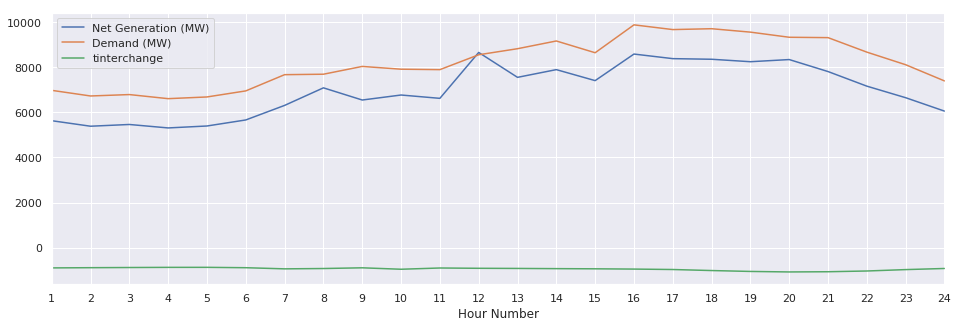

In [14]:
###	During their peak power usage?
electricity2=electricity1.groupby('Hour Number')['Net Generation (MW)', 'Demand (MW)','tinterchange'].mean()
electricity2.plot.line(xticks=range(1,25),use_index=True,figsize=(16,5))
####demand equals net generation minus total interchange. 

- From graph,overall we can see how the demand and net generation changing throughout the day

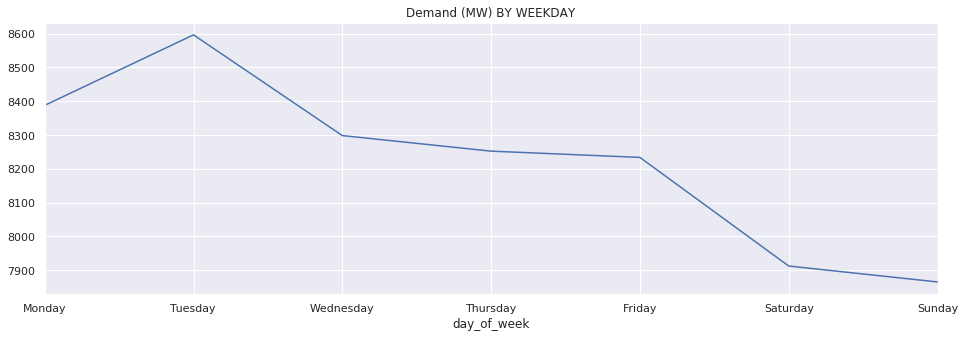

In [15]:
### Reindex weekday to display from Mon-Sun
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
electricity32=electricity1.groupby('day_of_week')['Demand (MW)'].mean()
weekday=electricity32.reindex(cats).astype(float)
weekday.plot(figsize=(16,5),title='Demand (MW) BY WEEKDAY') ## demand changing during weekday

- As we can see from graph, demand increase from monday then tuesday get peak then weekend get lowest demand,it showing workday demand more energy than weekend.

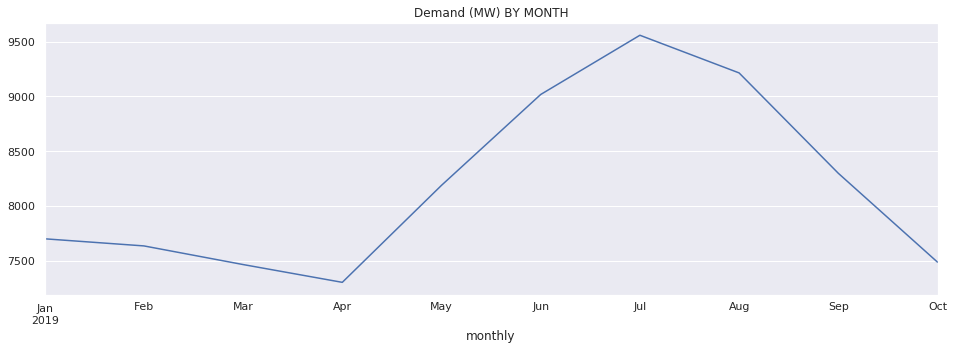

In [16]:
electricity33=electricity1.groupby('monthly')['Demand (MW)'].mean()
electricity33.plot.line(use_index=True,figsize=(16,5),title='Demand (MW) BY MONTH')## demand changing during months

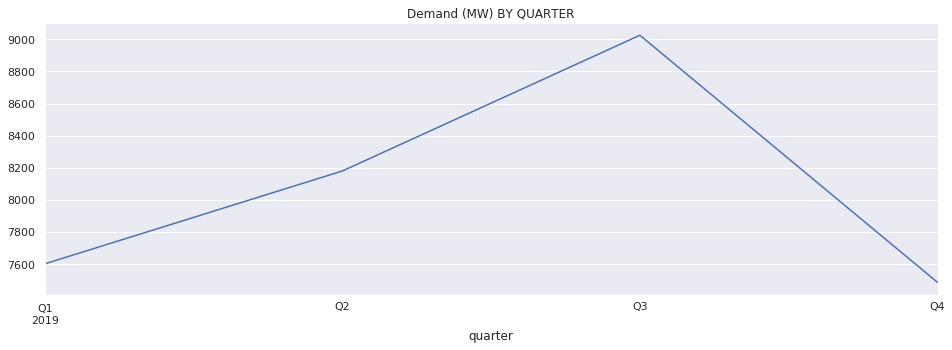

In [17]:
electricity34=electricity1.groupby('quarter')['Demand (MW)'].mean()
electricity34.plot.line(use_index=True,figsize=(16,5),title='Demand (MW) BY QUARTER')## demand changing during quarters

- Demand also effect by month and season, it shows the highest demand during quarter 3 which weather is warmer and consume more energy.

## Answering the questions

Below are some of the questions we would like to answer:


1.	Which balancing authorities are exhibiting negative interchanges:
a.	On a daily basis?
b.	During their peak power usage?
c.	On select days?
d.	During select seasons?

2.	How do the top 10 balancing authorities with negative interchanges and the top 10 balancing authorities with positive exchanges compare in terms of:
a.	Overall demand?
b.	Excess or deficient capacity?
c.	Favored energy generation sources (i.e., nuclear, natural gas, solar, etc.)?

3.	What are the top 5 balancing authorities and regions for each available energy generation source?

4.	Are there regions with clusters of balancing authorities with consistent positive or negative interchanges?

5.	Does energy production from specific energy sources fluctuate throughout each day?  Week?  Month?

6.	[Bonus 5 Points] Are there specific regions with consistent negative interchanges that have high potential for supplemental solar or wind energy installation?

###  Question 1: 
Which balancing authorities exhibit negative interchanges:
- -Consistently?​
- -During their peak power usage?​
- -On select days?​
- -During select seasons?



#### Step 1
Find top 10 Balancing Authorities With negative interchanges ( Mean value)


In [18]:
electricity20=electricity.groupby('Balancing Authority')['tinterchange', 'Demand (MW)', 'Net Generation (MW)'].mean().sort_values(by=['tinterchange'], ascending=False)
electricity20.tail(10) ## top 10 negative total interchanges

tinterchange   Demand (MW)  Net Generation (MW)
Balancing Authority                                                 
AVA                   -540.903415   1455.545784           914.642369
NEVP                  -805.553825   4362.107232          3673.485675
PACW                  -822.729477   2333.465923          1510.736446
PSEI                 -1374.226524   3280.186822          1905.960298
FPC                  -1563.240352   6436.158557          5277.000140
PGE                  -1669.908131   2301.441985           640.320457
ISNE                 -2513.544255  13483.306100         10969.761845
NYIS                 -2931.740381  17921.789971         14990.049590
CISO                 -5868.658598  24660.568480         17905.581349
MISO                 -6001.474722  74745.682090         69776.039183

#### Step 2
Group top 5 Balancing Authorities With negative interchanges with hour and make graph to show how negative interchanges during hours


In [19]:
electricity3=electricity[electricity['Balancing Authority'].isin(['PGE','ISNE','NYIS','MISO','CISO'])] 
electricity3   ## group top 5 negative inter change balancing authority


Balancing Authority  Data Date  Hour Number Local Time at End of Hour  \
34745                 CISO 2019-01-01          1.0     01/01/2019 1:00:00 AM   
34746                 CISO 2019-01-01          2.0     01/01/2019 2:00:00 AM   
34747                 CISO 2019-01-01          3.0     01/01/2019 3:00:00 AM   
34748                 CISO 2019-01-01          4.0     01/01/2019 4:00:00 AM   
34749                 CISO 2019-01-01          5.0     01/01/2019 5:00:00 AM   
34750                 CISO 2019-01-01          6.0     01/01/2019 6:00:00 AM   
34751                 CISO 2019-01-01          7.0     01/01/2019 7:00:00 AM   
34752                 CISO 2019-01-01          8.0     01/01/2019 8:00:00 AM   
34753                 CISO 2019-01-01          9.0     01/01/2019 9:00:00 AM   
34754                 CISO 2019-01-01         10.0    01/01/2019 10:00:00 AM   
34755                 CISO 2019-01-01         11.0    01/01/2019 11:00:00 AM   
34756                 CISO 2019-01-01         12.0    01/01/2019 12:00:00 PM   
34757                 CISO 2019-01-01         13.0     01/01/2019 1:00:00 PM   
34758                 CISO 2019-01-01         14.0     01/01/2019 2:00:00 PM   
34759                 CISO 2019-01-01         15.0     01/01/2019 3:00:00 PM   
34760                 CISO 2019-01-01         16.0     01/01/2019 4:00:00 PM   
34761                 CISO 2019-01-01         17.0     01/01/2019 5:00:00 PM   
34762                 CISO 2019-01-01         18.0     01/01/2019 6:00:00 PM   
34763                 CISO 2019-01-01         19.0     01/01/2019 7:00:00 PM   
34764                 CISO 2019-01-01         20.0     01/01/2019 8:00:00 PM   
34765                 CISO 2019-01-01         21.0     01/01/2019 9:00:00 PM   
34766                 CISO 2019-01-01         22.0    01/01/2019 10:00:00 PM   
34767                 CISO 2019-01-01         23.0    01/01/2019 11:00:00 PM   
34768                 CISO 2019-01-01         24.0    01/02/2019 12:00:00 AM   
34769                 CISO 2019-01-02          1.0     01/02/2019 1:00:00 AM   
34770                 CISO 2019-01-02          2.0     01/02/2019 2:00:00 AM   
34771                 CISO 2019-01-02          3.0     01/02/2019 3:00:00 AM   
34772                 CISO 2019-01-02          4.0     01/02/2019 4:00:00 AM   
34773                 CISO 2019-01-02          5.0     01/02/2019 5:00:00 AM   
34774                 CISO 2019-01-02          6.0     01/02/2019 6:00:00 AM   
...                    ...        ...          ...                       ...   
117882                 PGE 2019-10-27         19.0     10/27/2019 7:00:00 PM   
117883                 PGE 2019-10-27         20.0     10/27/2019 8:00:00 PM   
117884                 PGE 2019-10-27         21.0     10/27/2019 9:00:00 PM   
117885                 PGE 2019-10-27         22.0    10/27/2019 10:00:00 PM   
117886                 PGE 2019-10-27         23.0    10/27/2019 11:00:00 PM   
117887                 PGE 2019-10-27         24.0    10/28/2019 12:00:00 AM   
117888                 PGE 2019-10-28          1.0     10/28/2019 1:00:00 AM   
117889                 PGE 2019-10-28          2.0     10/28/2019 2:00:00 AM   
117890                 PGE 2019-10-28          3.0     10/28/2019 3:00:00 AM   
117891                 PGE 2019-10-28          4.0     10/28/2019 4:00:00 AM   
117892                 PGE 2019-10-28          5.0     10/28/2019 5:00:00 AM   
117893                 PGE 2019-10-28          6.0     10/28/2019 6:00:00 AM   
117894                 PGE 2019-10-28          7.0     10/28/2019 7:00:00 AM   
117895                 PGE 2019-10-28          8.0     10/28/2019 8:00:00 AM   
117896                 PGE 2019-10-28          9.0     10/28/2019 9:00:00 AM   
117897                 PGE 2019-10-28         10.0    10/28/2019 10:00:00 AM   
117898                 PGE 2019-10-28         11.0    10/28/2019 11:00:00 AM   
117899                 PGE 2019-10-28         12.0    10/28/2019 12:00:00 PM   
117900 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


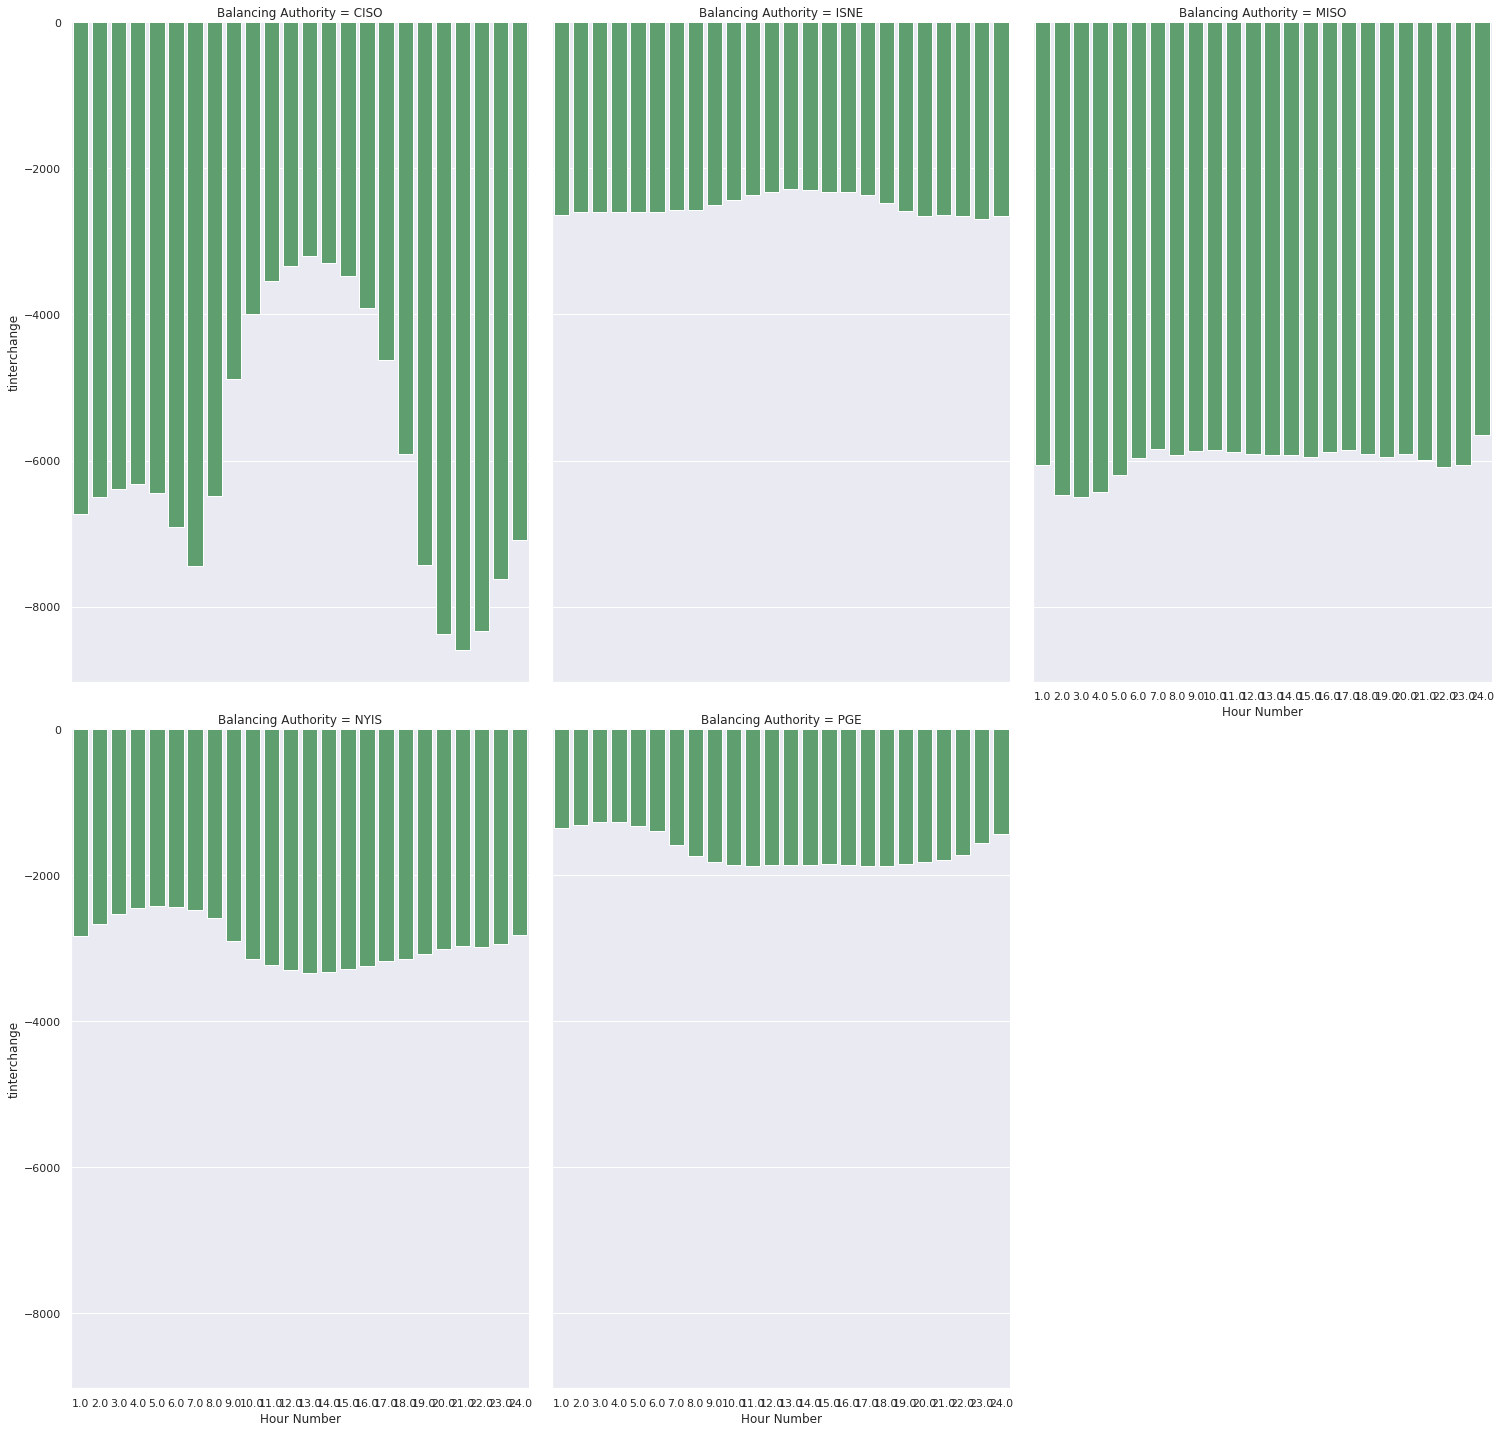

In [21]:
electricity4=electricity3.groupby(['Balancing Authority','Hour Number'])['tinterchange', 'Demand (MW)', 'Net Generation (MW)'].mean()
## group by balancing authority and hour number so dataframe can get ready for plot
electricity4.reset_index(inplace=True)
sns.factorplot(x='Hour Number',y='tinterchange',col='Balancing Authority',col_wrap=3,data=electricity4,kind="bar",size=10,aspect=0.7,color='g')

- For top 5 Balancing Authorities With negative interchanges('PGE','ISNE','NYIS','MISO','CISO'),they have difference changing trend during hours.
As we can see, NYIS and PGE: the negative total interchanges is increases ,since the demand increases during daytime it consume more energy. MISO and ISNE:  the total interchange actually get slight decrease, which means these two balancing Authorities produce more energy during daytime. But look at CISO, the negative total interchange are huge dropped during daytime ,that means one type of energy source produce so much more energy to help high demand.
We want to find out which type energy, so lets look into more see if we figure out.


#### Step 3
Group top 5 Balancing Authorities With negative interchanges with quater and make graph to show how negative interchanges during season


/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


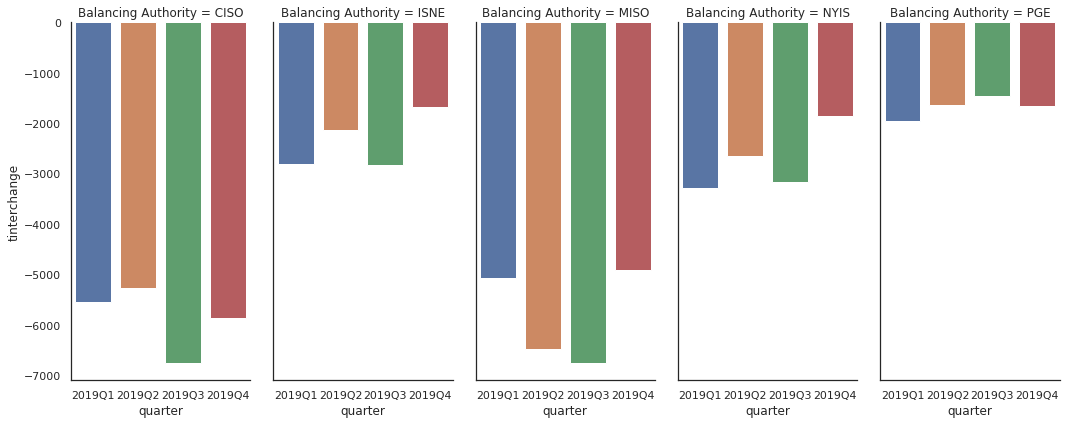

In [23]:
electricity6=electricity3.groupby(['Balancing Authority','quarter'])['Net Generation (MW)', 'Demand (MW)','tinterchange'].mean()
electricity6.reset_index(inplace=True)
with sns.axes_style('white'):
    sns.factorplot(x='quarter',y='tinterchange',col='Balancing Authority',data=electricity6,kind="bar",size=6,aspect=.5)

- Clear that season change is definitely effect negative total interchanges.Balancing Authorities ISNE & NYIS which are New England and new York area, they are  similar changing pattern. It make sense, they are in same region and  similar season. For Balancing Authorities MISO and CISO, they have highest negative total interchanges during Q3, but CISO has declined negative total interchanges during Q2 ,the reason for difference might be CISO produce more energy during the Q2.

#### Step 4
Group top 5 Balancing Authorities With negative interchanges with months and make graph to show how negative interchanges during months


In [24]:
electricity5=electricity3.groupby(['Balancing Authority','Data Date'])['Net Generation (MW)', 'Demand (MW)','tinterchange'].mean()
electricity5.head()

Net Generation (MW)   Demand (MW)  \
Balancing Authority Data Date                                       
CISO                2019-01-01         14802.416667  21828.500000   
                    2019-01-02         15684.458333  24043.083333   
                    2019-01-03         15137.125000  24454.333333   
                    2019-01-04         15074.375000  24104.791667   
                    2019-01-05         14124.958333  23942.041667   

                                tinterchange  
Balancing Authority Data Date                 
CISO                2019-01-01  -5539.125000  
                    2019-01-02  -7048.875000  
                    2019-01-03  -8158.291667  
                    2019-01-04  -8004.958333  
                    2019-01-05  -8500.750000

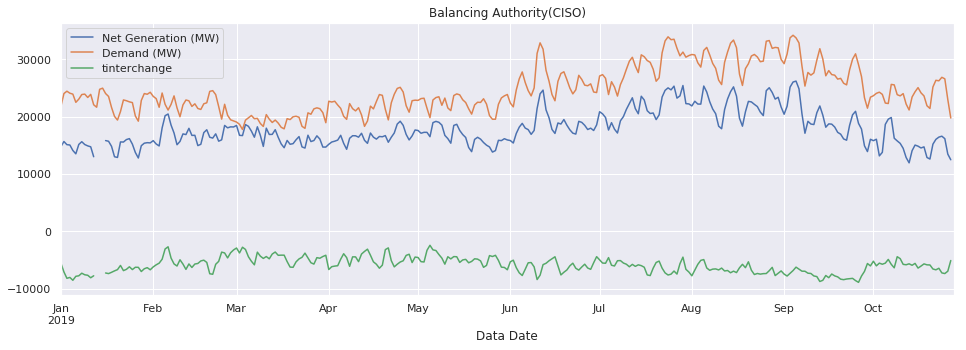

In [25]:
electricity5.loc['CISO'].plot(kind='line',label='CISO',title='Balancing Authority(CISO)',figsize=(16,5))
plt.legend(loc='upper left')   ###Balancing Authority(CISO)

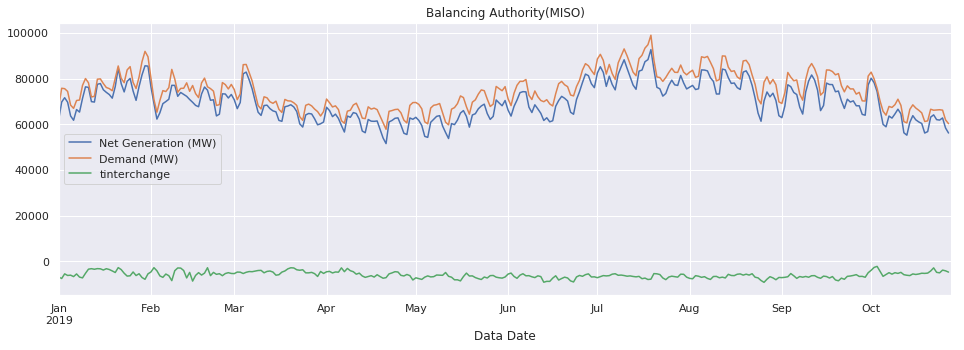

In [27]:
electricity5.loc['MISO'].plot(kind='line',label='MISO',title='Balancing Authority(MISO)',figsize=(16,5))
plt.legend(loc='center left')  ### polt Balancing Authority(MISO)

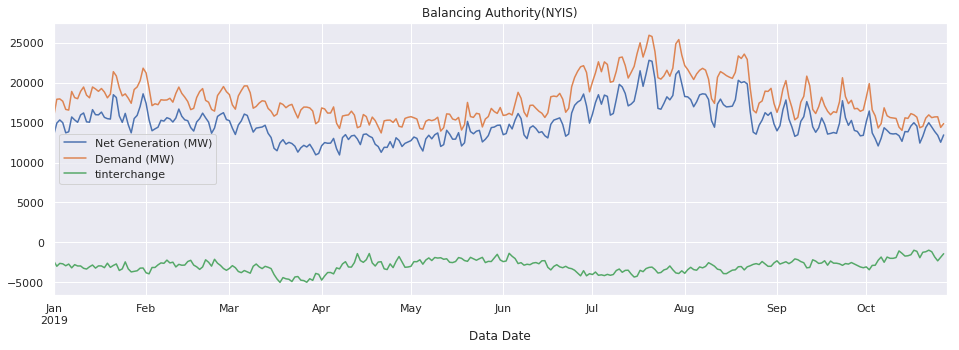

In [26]:
electricity5.loc['NYIS'].plot(kind='line',label='NYIS',title='Balancing Authority(NYIS)',figsize=(16,5))
plt.legend(loc='center left')  ### polt Balancing Authority(NYIS)

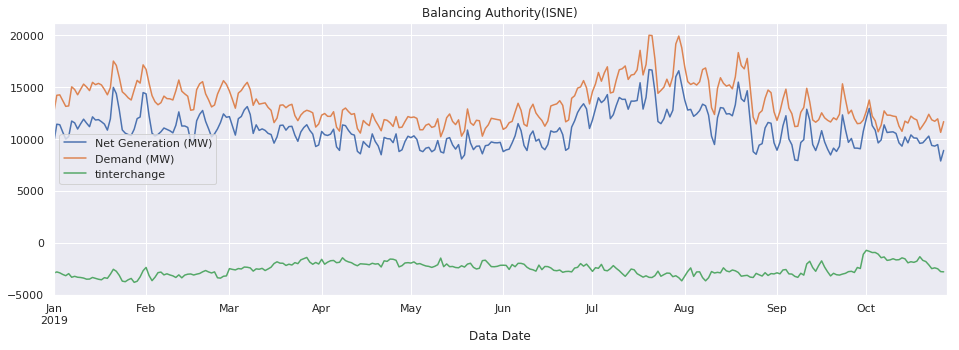

In [28]:
electricity5.loc['ISNE'].plot(kind='line',label='ISNE',title='Balancing Authority(ISNE)',figsize=(16,5))
plt.legend(loc='center left') ### polt Balancing Authority(ISNE)

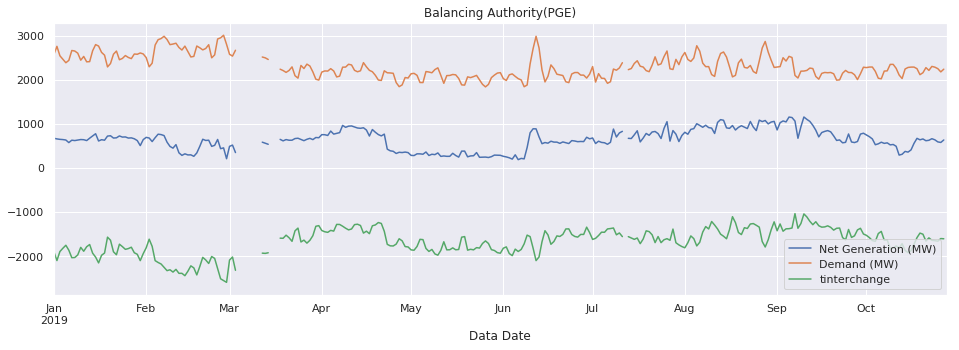

In [29]:
electricity5.loc['PGE'].plot(kind='line',label='PGE',title='Balancing Authority(PGE)',figsize=(16,5))
plt.legend(loc='best') ### polt Balancing Authority(PGE)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


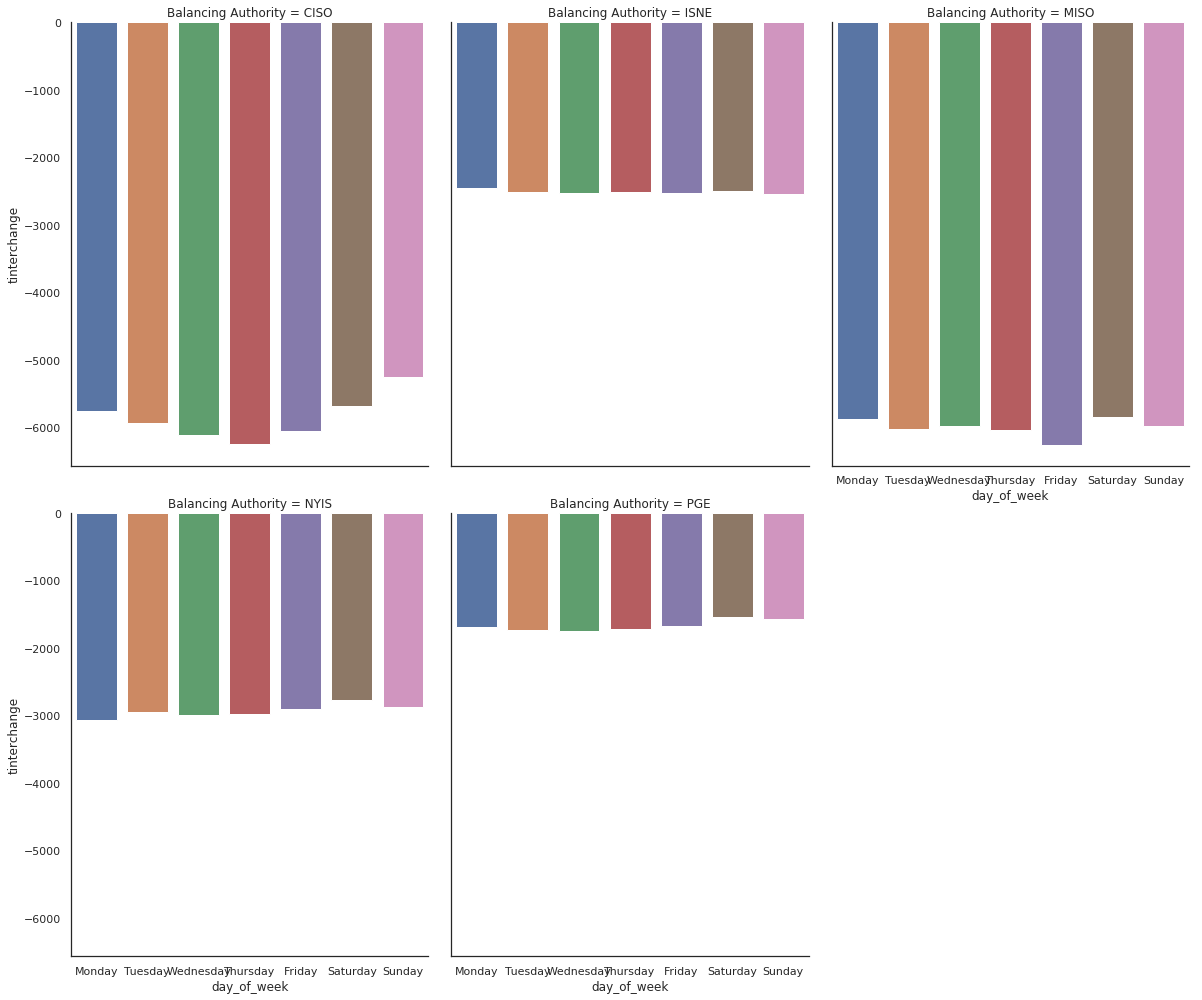

In [30]:
electricity7=electricity3.groupby(['Balancing Authority','day_of_week'])['Net Generation (MW)', 'Demand (MW)','tinterchange'].mean()
## groupby weekday with balacing authirity with net generation,demand,total interchange
electricity7.reset_index(inplace=True)
## plot top 5 balcaing authirity with total interchange during weekday 
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
with sns.axes_style('white'):
    sns.factorplot(x='day_of_week',y='tinterchange',col='Balancing Authority',col_wrap=3,data=electricity7,kind="bar",size=7,aspect=.8,order=cats)

- For the negative total interchanges during weekday, we can see CISO peak is on Thursday and Miso
Is at Friday, others balancing authorities are not changing too much though out the weekdays 


####  Conclusion for question 1: 
- Consistent negative interchange in a Balancing Authority means it consistently borrows power from other Balancing Authorities to meet its high demand.​

- Higher negative interchanges occur during daytime, workdays and during the summer and winter months.

### Question 2
How do the top 10 balancing authorities with negative interchanges and the top 10 balancing authorities with positive exchanges compare in terms of: 
a.	Overall demand?
b.	Excess or deficient capacity?
c.	Favored energy generation sources (i.e., nuclear, natural gas, solar, etc.)?


We are going to group values in the comb dataframe by balancing authorities to produce summary statistics. 

In [39]:
electricity.rename(columns={'tinterchange':'Total Interchange (MW)'},inplace=True)
comb = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)']
comb

Below are the top 10 balancing authorities with positive interchanges. BANC and SEC have a negative demand because demand is derived from Total Interchange and Net Generation. The source of this negative demand is likely solar-powered homes and businesses generating their own electricity.

In [38]:
top10 = comb.mean().sort_values(by=['Total Interchange (MW)'], ascending=False).head(10)
top10

Total Interchange (MW)   Demand (MW)  Net Generation (MW)
Balancing Authority                                                           
BANC                           26240.260592 -20662.624896          5583.847735
BPAT                            8197.539039   6264.806362         10046.400889
PJM                             3840.360000  91910.197073         94575.979928
SRP                             3746.503289   2911.671053          6394.416301
SC                              2752.530461   2752.530461          2172.324050
AZPS                            2645.774526   3501.591695          6161.423216
WACM                            1686.042085   2616.184306          4303.311250
SEC                             1244.783922   -134.151332          1561.041357
SPA                              914.572302     75.139742           989.712043
NWMT                             855.361951   1418.686969          2274.048920

Below is the bar chart for the raw data of total interchange, demand, and net generation.  There is relatively low overall demand in 8 of 10 entries.  As stated before, negative demand in BANC and SEC could be due to industrial or private power

Text(0.5, 1.0, 'Top 10 Balancing Authorities with Positive Net Interchanges')

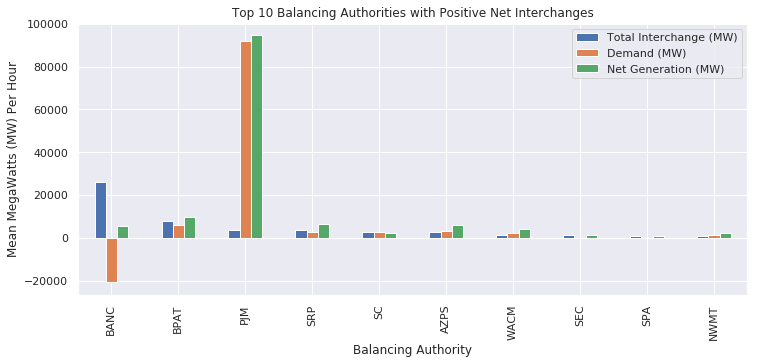

In [40]:
top10.plot.bar(figsize=(12,5));
plt.ylabel("Mean MegaWatts (MW) Per Hour")
plt.xlabel("Balancing Authority")
plt.title("Top 10 Balancing Authorities with Positive Net Interchanges")

Next, we show proportional statistics to demonstrate the ratio of total interchange to net generation or demand. 

In [41]:
top10Proportion = top10
top10Proportion['ProportionNetGen'] = top10Proportion['Total Interchange (MW)']/top10Proportion['Net Generation (MW)']
top10Proportion['Proportiondemand'] = top10Proportion['Total Interchange (MW)']/top10Proportion['Demand (MW)']
top10Proportion

Total Interchange (MW)   Demand (MW)  \
Balancing Authority                                         
BANC                           26240.260592 -20662.624896   
BPAT                            8197.539039   6264.806362   
PJM                             3840.360000  91910.197073   
SRP                             3746.503289   2911.671053   
SC                              2752.530461   2752.530461   
AZPS                            2645.774526   3501.591695   
WACM                            1686.042085   2616.184306   
SEC                             1244.783922   -134.151332   
SPA                              914.572302     75.139742   
NWMT                             855.361951   1418.686969   

                     Net Generation (MW)  ProportionNetGen  Proportiondemand  
Balancing Authority                                                           
BANC                         5583.847735          4.699315         -1.269938  
BPAT                        10046.400889          0.815968          1.308506  
PJM                         94575.979928          0.040606          0.041784  
SRP                          6394.416301          0.585902          1.286719  
SC                           2172.324050          1.267090          1.000000  
AZPS                         6161.423216          0.429410          0.755592  
WACM                         4303.311250          0.391801          0.644466  
SEC                          1561.041357          0.797406         -9.278953  
SPA                           989.712043          0.924079         12.171619  
NWMT                         2274.048920          0.376141          0.602925

There is an extremely high proportion of exported total interchange relative to demand in 2 cases.  Specifically, the SEC
and SPA balancing authorities have, respectively, approximately 9 and 13 times the positive total interchange than demand.
Moreover, amongst the less extreme entries, 6 of the 10 entries produce a ratio of between 60% and 130% total interchange to demand.

Similar general ratios can be seen when considering total interchange to net generation.  The one extreme outlier, the BANC balancing authority, is mostly due to the negative demand with that balancing authority.  Due to the approximately 20,000MW
of average hourly negative demand with that balancing authority and the resulting approximately 26,000MW of hourly positive
total interchange, the ratio of total interchange to net generation is almost 5 times. 

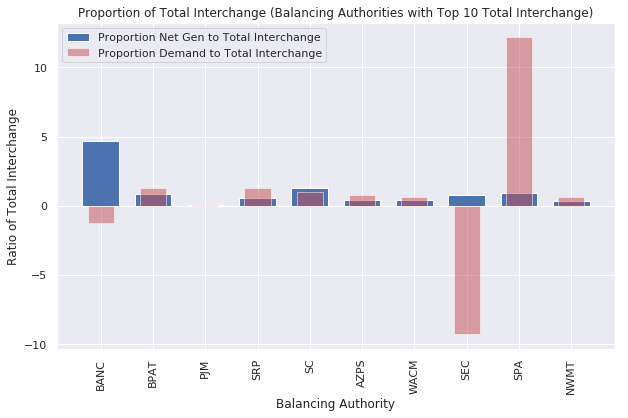

In [42]:
ProportionNetGen = top10Proportion['ProportionNetGen'].tolist()
ProportionDemand = top10Proportion['Proportiondemand'].tolist()
fig = plt.subplots(figsize=(10, 6))
plt.bar(np.arange(len(ProportionNetGen)), ProportionNetGen, width=0.7, color='b', label='Proportion Net Gen to Total Interchange')
plt.bar(np.arange(len(ProportionDemand)), ProportionDemand, width=0.5, color='r', alpha=0.5, label='Proportion Demand to Total Interchange')
plt.xticks(np.arange(10), top10.index.tolist(), rotation='vertical')
plt.ylabel("Ratio of Total Interchange")
plt.xlabel("Balancing Authority")
plt.title("Proportion of Total Interchange (Balancing Authorities with Top 10 Total Interchange)")
plt.legend()

Now, we look at the total interchange, demand, and net generation for the bottom 10 balancing authorities.  These balancing
authorities have the most extreme negative interchange values. 

In [43]:
# Finding the top 10 balancing authorities with negative interchanges.
bottom10 = comb.mean().sort_values(by=['Total Interchange (MW)'], ascending=False).tail(10)
bottom10

Total Interchange (MW)   Demand (MW)  Net Generation (MW)
Balancing Authority                                                           
AVA                             -540.903415   1455.545784           914.642369
NEVP                            -805.553825   4362.107232          3673.485675
PACW                            -822.729477   2333.465923          1510.736446
PSEI                           -1374.226524   3280.186822          1905.960298
FPC                            -1563.240352   6436.158557          5277.000140
PGE                            -1669.908131   2301.441985           640.320457
ISNE                           -2513.544255  13483.306100         10969.761845
NYIS                           -2931.740381  17921.789971         14990.049590
CISO                           -5868.658598  24660.568480         17905.581349
MISO                           -6001.474722  74745.682090         69776.039183

As the amount of negative average total interchange grows, a trend is present of progressively climbing demand occurs. This appears to indicate a habitual inability or unwillingness for net generation to meet demand requirements and reliance on
adjacent balancing authorities for interchange. 

Text(0.5, 1.0, 'Top 10 Balancing Authorities with Negative Net Interchanges')

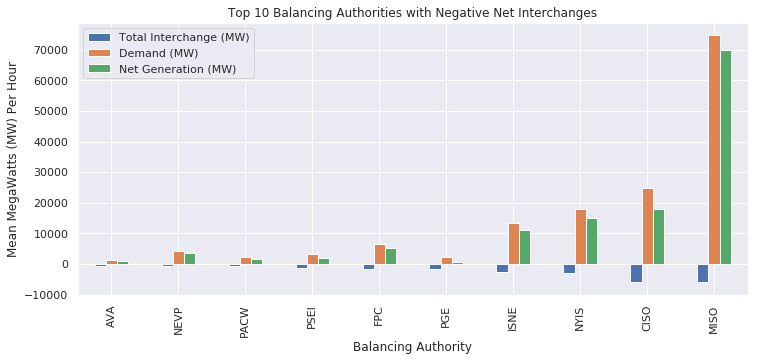

In [44]:
bottom10.plot.bar(figsize=(12,5));
plt.ylabel("Mean MegaWatts (MW) Per Hour")
plt.xlabel("Balancing Authority")
plt.title("Top 10 Balancing Authorities with Negative Net Interchanges")

Now, we explore the ratio of total interchange to net generation or demand for the 10 balancing authorities with the
greatest negative interchange. 

In [128]:
bottom10Proportion = bottom10
bottom10Proportion['ProportionNetGen'] = bottom10Proportion['Total Interchange (MW)']/bottom10Proportion['Net Generation (MW)']
bottom10Proportion['Proportiondemand'] = bottom10Proportion['Total Interchange (MW)']/bottom10Proportion['Demand (MW)']

Observing the y axis, one will notice that the scale is orders of magnitude lower than the scale used in the proportional
graph for the top 10 positive balancing authorities.  This is a result of the ratio of total interchange to demand or net generation being significantly less extreme with the top 10 balancing authorities exhibiting negative interchanges than with
the top 10 positive total interchanges. 

Despite the above observation, the resulting ratios are significant.  9 of the 10 bottom total interchanges still receive over 20% of their demand from adjacent balancing authorities.  This fact indicates a possible habitual or structual reliance
on exporting balancing authorities to fill the shortfalls of importing balancing authorities. 

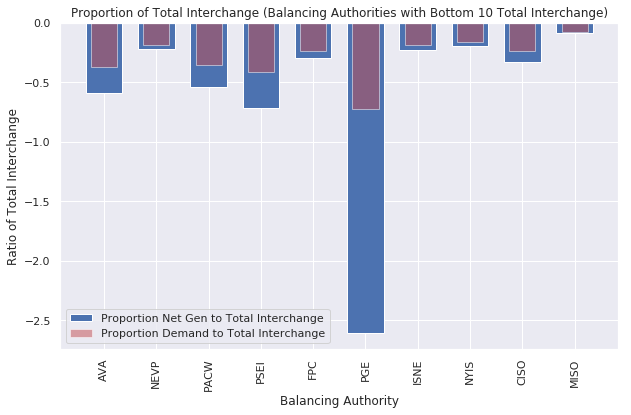

In [47]:
ProportionNetGenBottom = bottom10Proportion['ProportionNetGen'].tolist()
ProportionDemandBottom = bottom10Proportion['Proportiondemand'].tolist()
fig = plt.subplots(figsize=(10, 6))
plt.bar(np.arange(len(ProportionNetGenBottom)), ProportionNetGenBottom, width=0.7, color='b', label='Proportion Net Gen to Total Interchange')
plt.bar(np.arange(len(ProportionDemandBottom)), ProportionDemandBottom, width=0.5, color='r', alpha=0.5, label='Proportion Demand to Total Interchange')
plt.xticks(np.arange(10), bottom10.index.tolist(), rotation='vertical')
plt.ylabel("Ratio of Total Interchange")
plt.xlabel("Balancing Authority")
plt.title("Proportion of Total Interchange (Balancing Authorities with Bottom 10 Total Interchange)")
plt.legend()

Now we attempt to answer the final part of question 2 regarding the favored energy sources of both the top 10 and the 
bottom 10 balancing authorities. 

Concerning the top 10 balancing authorities, the graph no obvious favorite power source. 

Text(0.5, 1.0, 'Total Interchange and Energy Source (MW) for Balancing Authorities with the Top 10 Total Interchanges')

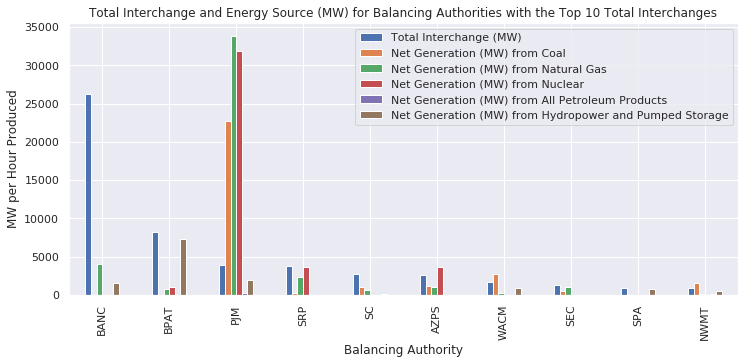

In [48]:
combSource = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Net Generation (MW) from Coal', 
                                                         'Net Generation (MW) from Natural Gas', 
                                                         'Net Generation (MW) from Nuclear', 
                                                         'Net Generation (MW) from All Petroleum Products', 
                                                         'Net Generation (MW) from Hydropower and Pumped Storage']

# Finding the top 10 balancing authorities with positive interchanges.
top10Sources = (combSource.mean().sort_values(by=['Total Interchange (MW)'], ascending=False).head(10)).fillna(value=0)
top10Sources.plot.bar(figsize=(12,5));
plt.ylabel("MW per Hour Produced")
plt.xlabel("Balancing Authority")
plt.title("Total Interchange and Energy Source (MW) for Balancing Authorities with the Top 10 Total Interchanges")

In [49]:
top10Sources

Total Interchange (MW)  Net Generation (MW) from Coal  \
Balancing Authority                                                          
BANC                           26240.260592                       0.000000   
BPAT                            8197.539039                       0.000000   
PJM                             3840.360000                   22667.649150   
SRP                             3746.503289                     219.419591   
SC                              2752.530461                    1080.112852   
AZPS                            2645.774526                    1182.766026   
WACM                            1686.042085                    2770.968088   
SEC                             1244.783922                     536.702602   
SPA                              914.572302                       0.000000   
NWMT                             855.361951                    1586.574913   

                     Net Generation (MW) from Natural Gas  \
Balancing Authority                                         
BANC                                          4033.017919   
BPAT                                           819.978886   
PJM                                          33842.672289   
SRP                                           2294.242690   
SC                                             629.622135   
AZPS                                          1046.703317   
WACM                                           258.743590   
SEC                                           1023.488228   
SPA                                              0.000000   
NWMT                                            43.123484   

                     Net Generation (MW) from Nuclear  \
Balancing Authority                                     
BANC                                         0.000000   
BPAT                                       981.425476   
PJM                                      31905.529691   
SRP                                       3696.666667   
SC                                           0.000000   
AZPS                                      3679.765747   
WACM                                         0.000000   
SEC                                          0.000000   
SPA                                          0.000000   
NWMT                                         0.000000   

                     Net Generation (MW) from All Petroleum Products  \
Balancing Authority                                                    
BANC                                                        0.000000   
BPAT                                                        0.000000   
PJM                                                       221.378311   
SRP                                                         0.000000   
SC                                                          0.030606   
AZPS                                                        0.000000   
WACM                                                        0.000000   
SEC                                                         0.000000   
SPA                                                         0.000000   
NWMT                                                       50.662578   

                     Net Generation (MW) from Hydropower and Pumped Storage  
Balancing Authority                                                          
BANC                                                       1575.200722       
BPAT                                                       7331.082789       
PJM                                                        1941.293699       
SRP                                                           1.228801       
SC                                                           69.641862       
AZPS                                                          0.000000       
WACM                                                        951.077480       
SEC                                                           0.000000       
SPA                  

Looking at the standard deviation of the top10Sources, we find a 28.70% average standard deviation for each energy source
used by a balancing authority.

In [50]:
from statistics import stdev
alldata = []
for i in top10Sources.index.tolist():
    # Excluding the first value as that is the total interchange.  All other values are from energy generation sources. 
    data = (top10Sources.loc[i][1:].tolist()/top10Sources.loc[i][1:].sum()).tolist()
    data2 = []
    for i in data:
        # An enery source must contribute to at least 5% of the balancing authority's net generation. 
        if i > 0.05:
            i *= 100
            data2.append(i)
    for i in data2:
        if len(data2)==1:
            alldata.append(data2[0])
        elif len(data2)==0:
            print('There was an error.')
        else:       
            std_dev = stdev(data2)
            alldata.append(std_dev)
avg_std_dev = sum(alldata)/len(alldata)
avg_std_dev
# The below is the whole percentage. 

28.782039059480663

Likewise, with the bottom 10 total interchanges, there is no clear favorite, although natural gas and nuclear make strong
showings in most balancing authorities. 

Text(0.5, 1.0, 'Total Interchange and Energy Source (MW) for Balancing Authorities with the Bottom 10 Total Interchanges')

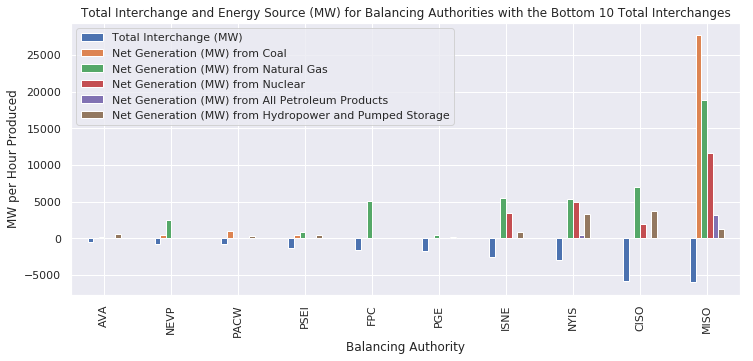

In [51]:
# Finding the bottom 10 balancing authorities with negative interchanges.
bottom10Sources = (combSource.mean().sort_values(by=['Total Interchange (MW)'], ascending=False).tail(10)).fillna(value=0)
bottom10Sources.plot.bar(figsize=(12,5));
plt.ylabel("MW per Hour Produced")
plt.xlabel("Balancing Authority")
plt.title("Total Interchange and Energy Source (MW) for Balancing Authorities with the Bottom 10 Total Interchanges")

When comparing aginst the average standard deviation for the top 10 positive balancing authorities, the top 10 negative 
balancing authorities have a lower average standard deviation of 25.54%.  This indicates a more even spread of power 
generation sources amongst balancing authorities with a negative interchange. 

In [53]:
# I imported stdev before. 
alldata = []
for i in bottom10Sources.index.tolist():
    # Excluding the first value as that is the total interchange.  All other values are from energy generation sources. 
    data = (bottom10Sources.loc[i][1:].tolist()/bottom10Sources.loc[i][1:].sum()).tolist()
    data2 = []
    for i in data:
        # An enery source must contribute to at least 5% of the balancing authority's net generation. 
        if i > 0.05:
            i *= 100
            data2.append(i)
    for i in data2:
        if len(data2)==1:
            alldata.append(data2[0])
        elif len(data2)==0:
            print('There was an error.')
        else:       
            std_dev = stdev(data2)
            alldata.append(std_dev)
avg_std_dev = sum(alldata)/len(alldata)
avg_std_dev
# The below is the whole percentage. 

25.553834369738137

The following section is not a part of question 2, but relies on data from question 2.  

The following code isolates the Generation-Only Balancing Authorities for comparison with the top 10 balancing authorities.  

In [54]:
gen_only=electricity[electricity['Balancing Authority'].isin(['DEAA','EEI','GRID','GRIF','GRMA','GWA','HGMA','SEPA','WWA','YAD'])]
gen_only_bas = gen_only.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)']
gen_only_bas_mean = gen_only_bas.mean().sort_values(by=['Total Interchange (MW)'], ascending=False)
gen_only_bas_mean

Total Interchange (MW)  Demand (MW)  Net Generation (MW)
Balancing Authority                                                          
EEI                              495.349736          NaN           465.479877
GRID                             486.595916          NaN           486.595916
GRIF                             360.661806          NaN           360.661806
DEAA                             311.235694          NaN           311.235694
SEPA                             241.992310          NaN           272.633949
YAD                              116.977982          NaN           119.919593
WWA                               61.577350          NaN            62.477233
GWA                               54.167250          NaN            54.823847
HGMA                              -0.780139          NaN            -0.780139

As one can see from the following chart, the generation-only balancing authorities have a very small fraction of the total
interchange of the top 10 positive balancing authorities.  This fact renders them largely insignificant in the overall 
discussion. 

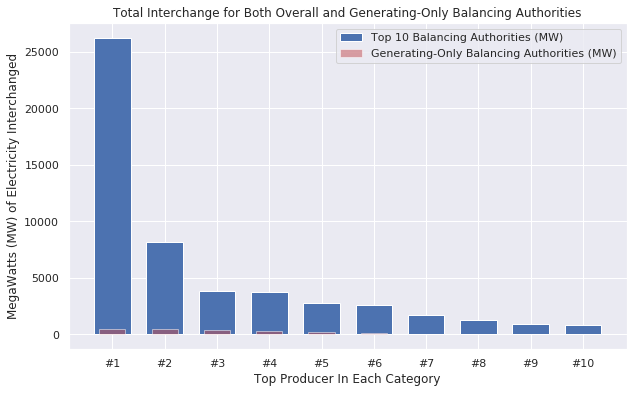

In [55]:
# Creating lists of the generation-only balancing authorities and the top 10 balancing authorities for inclusion in the 
# following chart. 
gen_only_bas_mean_list = []
for i in range(len(gen_only_bas_mean)):
    gen_only_bas_mean_list.append(gen_only_bas_mean['Total Interchange (MW)'][i])

top10_bas_mean_list = []
for i in range(len(top10)):
    top10_bas_mean_list.append(top10['Total Interchange (MW)'][i])

plt.figure(figsize=(10,6))

plt.bar(np.arange(len(top10_bas_mean_list)), top10_bas_mean_list, width=0.7, color='b', label='Top 10 Balancing Authorities (MW)')
plt.bar(np.arange(len(gen_only_bas_mean_list)), gen_only_bas_mean_list, width=0.5, color='r', alpha=0.5, label='Generating-Only Balancing Authorities (MW)')

plt.xticks(np.arange(len(top10_bas_mean_list)), ["#{}".format(i) for i in range(1,11)])

plt.ylabel("MegaWatts (MW) of Electricity Interchanged")
plt.xlabel("Top Producer In Each Category")
plt.title("Total Interchange for Both Overall and Generating-Only Balancing Authorities")

plt.legend()
plt.show()

### Question 3 - What are the top 5 balancing authorities and regions for each available energy generation source?

To answer this question, we need to group the dataset by balancing authorities and take a mean of each of the variables. So we can look at the top 5 Balancing Authority for each of our variable.

Before moving forward with the question, we are adding the latitude and longitude for some of the Balancing Authority regions so they can be visualised on a map.

In [56]:
#Setting up the latitudes and longitudes 
electricity.loc[electricity['Balancing Authority'] == 'ERCO', 'lon'] = -99.901  
electricity.loc[electricity['Balancing Authority'] == 'ERCO', 'lat'] = 31.968  
electricity.loc[electricity['Balancing Authority'] == 'PJM', 'lon'] = -77.1945   
electricity.loc[electricity['Balancing Authority'] == 'PJM', 'lat'] = 41.2033 
electricity.loc[electricity['Balancing Authority'] == 'BANC', 'lon'] = -119.4179   
electricity.loc[electricity['Balancing Authority'] == 'BANC', 'lat'] = 36.7783
electricity.loc[electricity['Balancing Authority'] == 'CISO', 'lon'] = -119.4179   
electricity.loc[electricity['Balancing Authority'] == 'CISO', 'lat'] = 36.7783
electricity.loc[electricity['Balancing Authority'] == 'LDWP', 'lon'] = -119.4179   
electricity.loc[electricity['Balancing Authority'] == 'LDWP', 'lat'] = 36.7783
electricity.loc[electricity['Balancing Authority'] == 'BPAT', 'lon'] = -120.7401   
electricity.loc[electricity['Balancing Authority'] == 'BPAT', 'lat'] = 47.7511
electricity.loc[electricity['Balancing Authority'] == 'PGE', 'lon'] = -120.7401   
electricity.loc[electricity['Balancing Authority'] == 'PGE', 'lat'] = 47.7511
electricity.loc[electricity['Balancing Authority'] == 'NWMT', 'lon'] = -120.7401   
electricity.loc[electricity['Balancing Authority'] == 'NWMT', 'lat'] = 47.7511
electricity.loc[electricity['Balancing Authority'] == 'IPCO', 'lon'] = -120.7401   
electricity.loc[electricity['Balancing Authority'] == 'IPCO', 'lat'] = 47.7511
electricity.loc[electricity['Balancing Authority'] == 'SRP', 'lon'] = -111.0937   
electricity.loc[electricity['Balancing Authority'] == 'SRP', 'lat'] = 34.0489
electricity.loc[electricity['Balancing Authority'] == 'SC', 'lon'] = -79.0193   
electricity.loc[electricity['Balancing Authority'] == 'SC', 'lat'] = 35.7596
electricity.loc[electricity['Balancing Authority'] == 'DUK', 'lon'] = -79.0193   
electricity.loc[electricity['Balancing Authority'] == 'DUK', 'lat'] = 35.7596
electricity.loc[electricity['Balancing Authority'] == 'CPLE', 'lon'] = -79.0193   
electricity.loc[electricity['Balancing Authority'] == 'CPLE', 'lat'] = 35.7596
electricity.loc[electricity['Balancing Authority'] == 'MISO', 'lon'] = -94.6859   
electricity.loc[electricity['Balancing Authority'] == 'MISO', 'lat'] = 46.7296
electricity.loc[electricity['Balancing Authority'] == 'NYIS', 'lon'] = -74.0060   
electricity.loc[electricity['Balancing Authority'] == 'NYIS', 'lat'] = 40.7128
electricity.loc[electricity['Balancing Authority'] == 'ISNE', 'lon'] = -70.8227   
electricity.loc[electricity['Balancing Authority'] == 'ISNE', 'lat'] = 43.9654
electricity.loc[electricity['Balancing Authority'] == 'SWPP', 'lon'] = -98.4842   
electricity.loc[electricity['Balancing Authority'] == 'SWPP', 'lat'] = 39.0119
electricity.loc[electricity['Balancing Authority'] == 'SOCO', 'lon'] = -86.9023   
electricity.loc[electricity['Balancing Authority'] == 'SOCO', 'lat'] = 32.3182
electricity.loc[electricity['Balancing Authority'] == 'FPL', 'lon'] = -81.5158   
electricity.loc[electricity['Balancing Authority'] == 'FPL', 'lat'] = 27.6648
electricity.loc[electricity['Balancing Authority'] == 'TVA', 'lon'] = -86.5804   
electricity.loc[electricity['Balancing Authority'] == 'TVA', 'lat'] = 35.5175


#### Top 5 for total positive interchange

In [57]:
#Grouping by balancing authorities

c_elec = electricity.groupby('Balancing Authority')['Balancing Authority','Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)', 'lon', 'lat']

#Top 5 with positive interchange
inter = c_elec.mean().sort_values(by=['Total Interchange (MW)'], ascending=False).head(5)
inter

Total Interchange (MW)   Demand (MW)  \
Balancing Authority                                         
BANC                           26240.260592 -20662.624896   
BPAT                            8197.539039   6264.806362   
PJM                             3840.360000  91910.197073   
SRP                             3746.503289   2911.671053   
SC                              2752.530461   2752.530461   

                     Net Generation (MW)       lon      lat  
Balancing Authority                                          
BANC                         5583.847735 -119.4179  36.7783  
BPAT                        10046.400889 -120.7401  47.7511  
PJM                         94575.979928  -77.1945  41.2033  
SRP                          6394.416301 -111.0937  34.0489  
SC                           2172.324050  -79.0193  35.7596

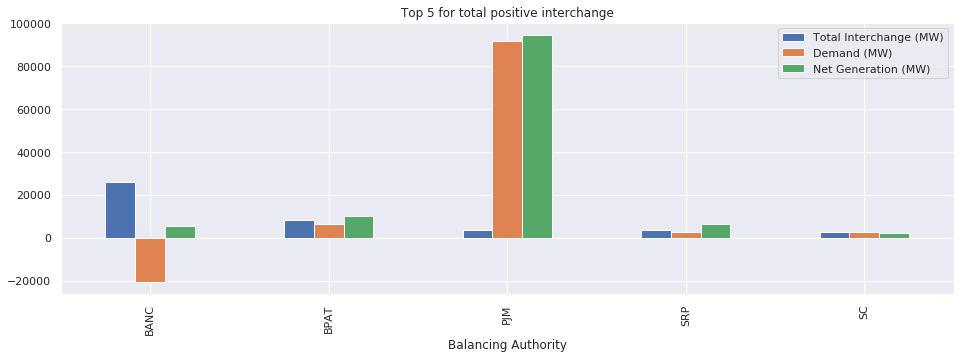

In [58]:
#Bar chart
inter[['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)']].plot.bar(figsize=(16,5));
plt.title('Top 5 for total positive interchange');

#### Top 5 for total negative interchange

In [59]:
#Top 5 with negative interchange

intertail = c_elec.mean().sort_values(by=['Total Interchange (MW)'], ascending=False).tail(5)
intertail

Total Interchange (MW)   Demand (MW)  \
Balancing Authority                                         
PGE                            -1669.908131   2301.441985   
ISNE                           -2513.544255  13483.306100   
NYIS                           -2931.740381  17921.789971   
CISO                           -5868.658598  24660.568480   
MISO                           -6001.474722  74745.682090   

                     Net Generation (MW)       lon      lat  
Balancing Authority                                          
PGE                           640.320457 -120.7401  47.7511  
ISNE                        10969.761845  -70.8227  43.9654  
NYIS                        14990.049590  -74.0060  40.7128  
CISO                        17905.581349 -119.4179  36.7783  
MISO                        69776.039183  -94.6859  46.7296

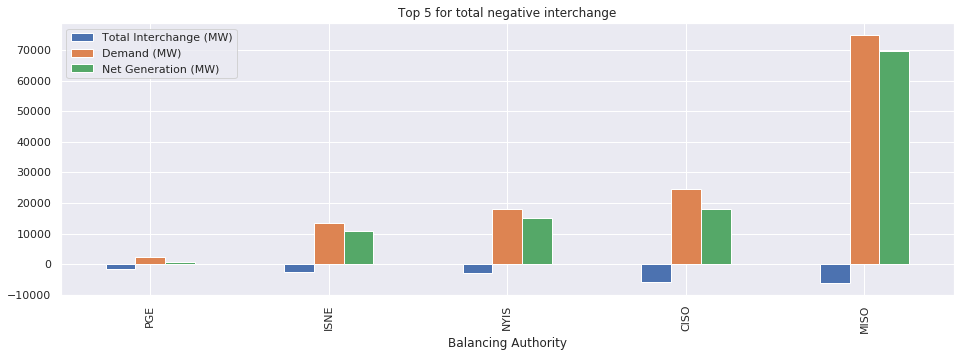

In [60]:
intertail[['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)']].plot.bar(figsize=(16,5));
plt.title('Top 5 for total negative interchange');

#### Top 5 based on total demand

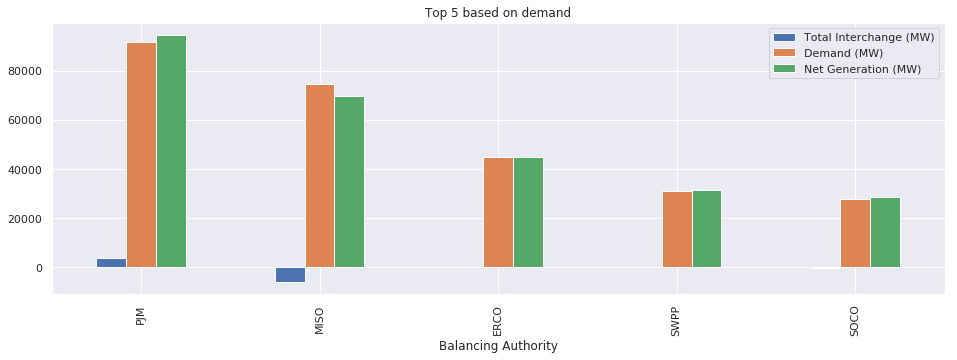

In [61]:
#Top 5 based on demand
dem = c_elec.mean().sort_values(by=['Demand (MW)'], ascending=False).head(5)
dem[['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)']].plot.bar(figsize=(16,5));
plt.title('Top 5 based on demand');

#### Top 5 based on net generation

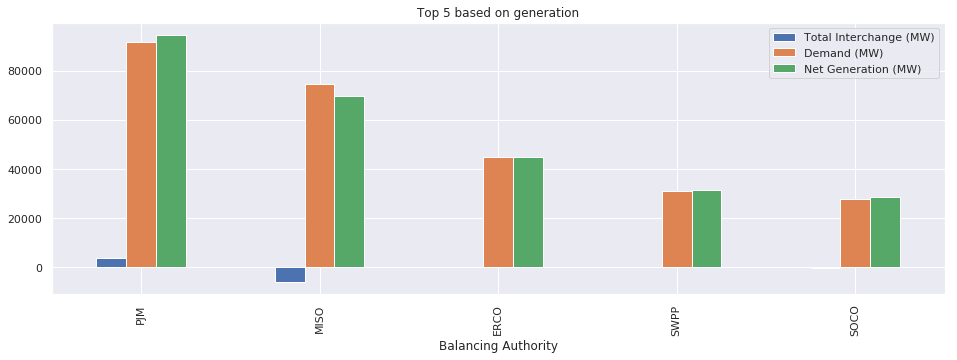

In [62]:
#Top 5 based on generation

gen = c_elec.mean().sort_values(by=['Net Generation (MW)'], ascending=False).head(5)
gen[['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)']].plot.bar(figsize=(16,5));
plt.title('Top 5 based on generation');

#### Top 5 for different energy sources

##### Coal

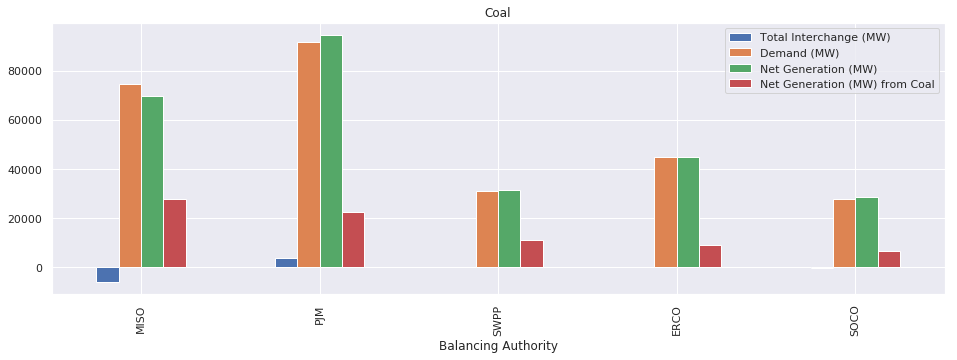

In [63]:
# Now looking at different sources of energy. 

#Top 5 for coal

coal = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from Coal']
coal5 = coal.mean().sort_values(by=['Net Generation (MW) from Coal'], ascending=False).head(5)
coal5.plot.bar(figsize=(16,5));
plt.title('Coal');

##### Natural Gas

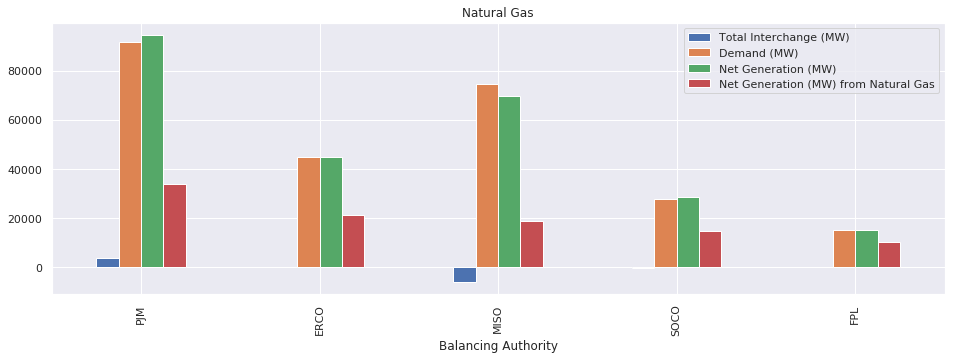

In [64]:
#Top 5 for natural gas

gas = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from Natural Gas']
gas5 = gas.mean().sort_values(by=['Net Generation (MW) from Natural Gas'], ascending=False).head(5)
gas5.plot.bar(figsize=(16,5));
plt.title('Natural Gas');

##### Nuclear Energy

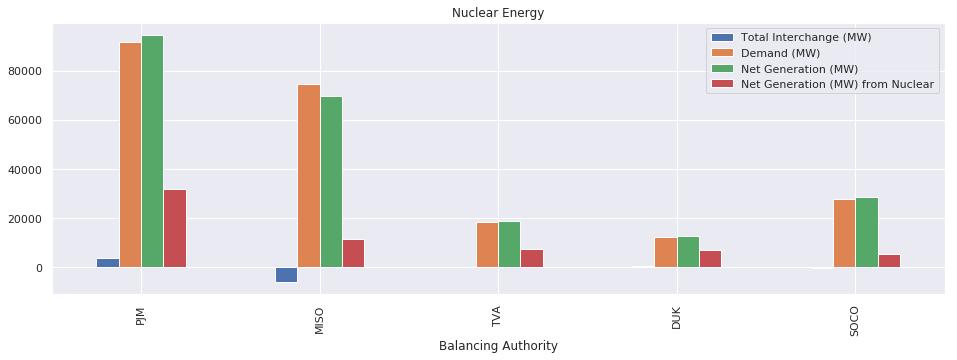

In [65]:
#Top 5 for nuclear energy

nuc = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from Nuclear']
nuc5 = nuc.mean().sort_values(by=['Net Generation (MW) from Nuclear'], ascending=False).head(5)
nuc5.plot.bar(figsize=(16,5));
plt.title('Nuclear Energy');

##### All petroleum based energy sources

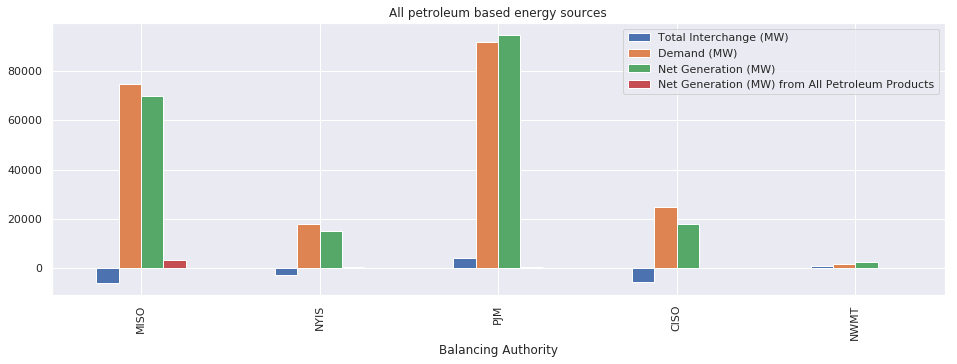

In [66]:
#Top 5 for all petroleum based energy sources

petro = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from All Petroleum Products']
petro5 = petro.mean().sort_values(by=['Net Generation (MW) from All Petroleum Products'], ascending=False).head(5)
petro5.plot.bar(figsize=(16,5));
plt.title('All petroleum based energy sources');

##### Hydropower and pumped storage

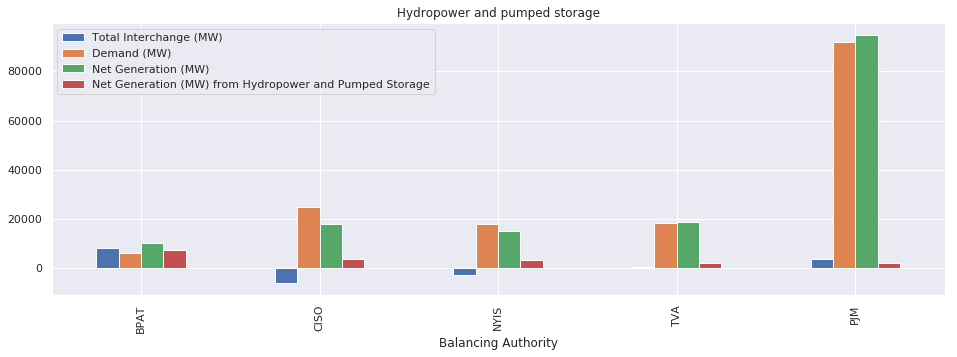

In [67]:
#Top 5 for hydropower and pumped storage

hydro = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from Hydropower and Pumped Storage']
hydro5 = hydro.mean().sort_values(by=['Net Generation (MW) from Hydropower and Pumped Storage'], ascending=False).head(5)
hydro5.plot.bar(figsize=(16,5));
plt.title('Hydropower and pumped storage');

##### Solar energy

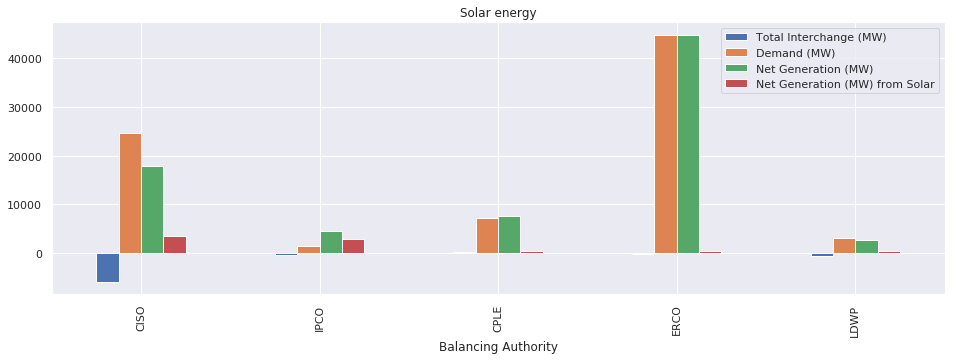

In [68]:
#Top 5 for solar energy

solar = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from Solar', 'lon','lat']
solar5 = solar.mean().sort_values(by=['Net Generation (MW) from Solar'], ascending=False).head(5)
solar5[['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)','Net Generation (MW) from Solar']].plot.bar(figsize=(16,5));
plt.title('Solar energy');

##### Wind energy

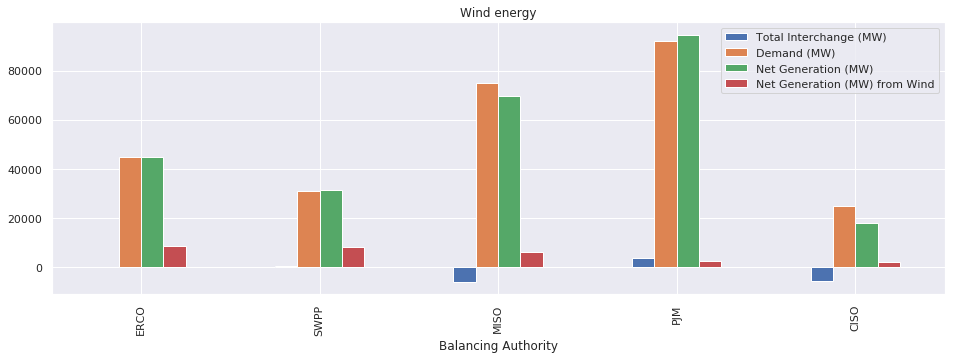

In [69]:
#Top 5 for wind energy

wind = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from Wind','lon','lat']
wind5 = wind.mean().sort_values(by=['Net Generation (MW) from Wind'], ascending=False).head(5)
wind5[['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)','Net Generation (MW) from Wind']].plot.bar(figsize=(16,5));
plt.title('Wind energy');

##### Other fuel sources

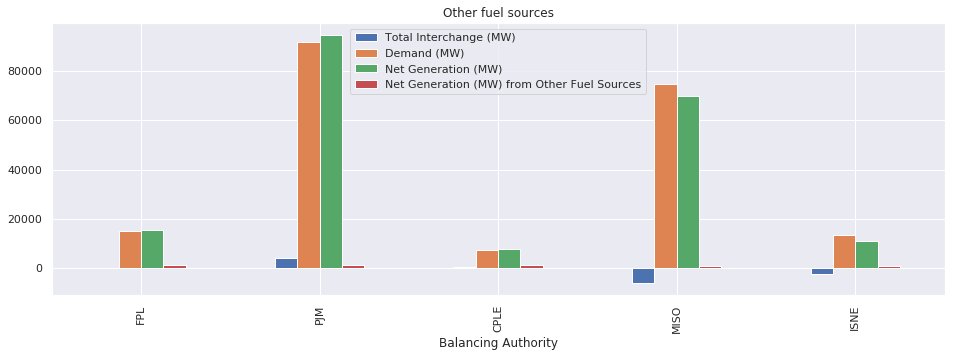

In [70]:
#Top 5 for other fuel sources
#

other = electricity.groupby('Balancing Authority')['Total Interchange (MW)', 'Demand (MW)', 'Net Generation (MW)',
                                                         'Net Generation (MW) from Other Fuel Sources']
other5 = other.mean().sort_values(by=['Net Generation (MW) from Other Fuel Sources'], ascending=False).head(5)
other5.plot.bar(figsize=(16,5));
plt.title('Other fuel sources');

All the datarows for unknown fuel sources are NaN, so that column was ignored.

### Question 4.
In regions with more than one balancing authority, is there a pattern of positive or negative interchanges?

In [117]:
# Reading a csv file that matches balancing authorities with regions. 
regions_xls = pd.read_csv("regions.csv")
regions_xls[:5]

Balancing Authority                Region
0                 AEC             Southeast
1                AECI               Midwest
2               AESO   Canadian Authorities
3                AVA              Northwest
4                AZPS             Southwest

In [118]:
# Identifying the number of balancing authorities per region. 
region_count = regions_xls.groupby(['Region'])['Balancing Authority'].count()
region_count

Region
California                               4
Canadian Authorities                     5
Carolinas                                6
Central                                  2
Florida                                  5
Mexican Authorities                      2
Mid-Atlantic                             2
Midwest                                  4
New England ISO                          1
New York Independent System Operator     1
Northwest                               16
Southeast                                3
Southwest                                7
Tennessee Valley Authority               1
Name: Balancing Authority, dtype: int64

In [119]:
# Creating a function that returns a list of the balancing authorities in a region. 
def ba_calc(series):
    BAs = []
    for i in range(len(series)):
        BAs.append(series.values[i])
    return BAs

# Testing the above function on the California region. 
California_BAs = regions_xls.loc[regions_xls['Region'] == 'California']['Balancing Authority']
ba_calc(California_BAs)

['BANC', 'CISO ', 'LDWP', 'TIDC']

In [120]:
# A dataframe of all 65 balancing authorities and their Total Interchange, Demand, and Net Generation, in MW. 
# The dataframe is ordered by the greatest Total Interchange. 
ordered = comb.mean().sort_values(by=['Total Interchange (MW)'], ascending=False)
ordered[0:67]

Total Interchange (MW)   Demand (MW)  Net Generation (MW)
Balancing Authority                                                           
BANC                           26240.260592 -20662.624896          5583.847735
BPAT                            8197.539039   6264.806362         10046.400889
PJM                             3840.360000  91910.197073         94575.979928
SRP                             3746.503289   2911.671053          6394.416301
SC                              2752.530461   2752.530461          2172.324050
AZPS                            2645.774526   3501.591695          6161.423216
WACM                            1686.042085   2616.184306          4303.311250
SEC                             1244.783922   -134.151332          1561.041357
SPA                              914.572302     75.139742           989.712043
NWMT                             855.361951   1418.686969          2274.048920
CHPD                             660.292003    198.105461           858.397464
AVRN                             592.894152           NaN           592.894152
EEI                              495.349736           NaN           465.479877
DUK                              487.159652  12346.748597         12833.685045
GRID                             486.595916           NaN           486.595916
GRIF                             360.661806           NaN           360.661806
GCPD                             324.060008    616.789276           936.734963
TVA                              312.221064  18364.377499         18673.027175
DEAA                             311.235694           NaN           311.235694
SCEG                             287.742021   2861.678746          3171.076098
SWPP                             281.142021  31068.629003         31339.108516
CPLE                             245.121644   7172.765660          7719.036214
SEPA                             241.992310           NaN           272.633949
DOPD                             215.317842    200.613505           415.931346
IID                              176.536318    434.351633           620.221284
TEC                              150.423693   2536.110523          2686.528502
YAD                              116.977982           NaN           119.919593
FPL                              111.641478  15081.978049         15193.667408
AEC                               81.989899    548.028199           629.872054
AECI                              74.169190   2653.769690          2727.938880
...                                     ...           ...                  ...
GVL                              -24.900617    252.450633           227.554888
WAUW                             -29.156976     91.559341            62.335492
PNM                              -31.275673   1591.616021          1560.340348
NSB                              -53.776134     53.776134             0.000000
FMPP                             -59.286093   2105.590440          2047.269509
ERCO                             -61.965849  44832.808223         44771.704669
HST                              -68.711912     68.731484             0.018164
TIDC                            -118.491371    316.613722           198.174127
WALC                            -123.070889   1175.696349          1052.023411
PACE                            -207.561600   4786.847434          4579.285834
IPCO                            -271.599721   1501.303372          4479.607999
TPWR                            -346.542224    536.443562           189.901338
CPLW                            -358.351790    577.251119           219.479446
EPE                             -370.686901   1005.711904           635.671760
TEPC                            -391.918275   1488.482602          1096.565643
PSCO                            -394.708571   5405.310941          5010.617561
SCL                             -413.028619   1057.105585           644.221728
SOCO                            -434.924295  27776.532991         28484

In [122]:
# Identifying the balancing authorities for each region. 
California_BAs = regions_xls.loc[regions_xls['Region'] == 'California']['Balancing Authority']
California = ba_calc(California_BAs)
Carolinas_BAs = regions_xls.loc[regions_xls['Region'] == 'Carolinas']['Balancing Authority']
Carolinas = ba_calc(Carolinas_BAs)
Central_BAs = regions_xls.loc[regions_xls['Region'] == 'Central']['Balancing Authority']
Central = ba_calc(Central_BAs)
Florida_BAs = regions_xls.loc[regions_xls['Region'] == 'Florida']['Balancing Authority']
Florida = ba_calc(Florida_BAs)
Mid_Atl_BAs = regions_xls.loc[regions_xls['Region'] == 'Mid-Atlantic']['Balancing Authority']
Mid_Atlantic = ba_calc(Mid_Atl_BAs)
Midwest_BAs = regions_xls.loc[regions_xls['Region'] == 'Midwest']['Balancing Authority']
Midwest = ba_calc(Midwest_BAs)
NW_BAs = regions_xls.loc[regions_xls['Region'] == 'Northwest']['Balancing Authority']
Northwest = ba_calc(NW_BAs)
SE_BAs = regions_xls.loc[regions_xls['Region'] == 'Southeast']['Balancing Authority']
Southeast = ba_calc(SE_BAs)
SW_BAs = regions_xls.loc[regions_xls['Region'] == 'Southwest']['Balancing Authority']
Southwest = ba_calc(SW_BAs)

In [123]:
# Correcting two items with the California region to ensure it can fit on the final chart. 
California_Corrected = ordered.loc[California]['Total Interchange (MW)'].tolist()
# The first entry is set to 5900 so that number line to final value appears on chart. 
California_Corrected[0]=5900
# The second entry is corrected to the actual value.  We are not sure why, but certain values appear as NaN when they
# have values that are othewise unremarkable from the other entries in the dataset. 
California_Corrected[1]=-5849.267229
California_Corrected

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


[5900, -5849.267229, -495.29250278706803, -118.49137084327207]

In [124]:
# Correcting one item with the Carolinas region to ensure it can fit on the final chart.
Carolinas_Corrected = ordered.loc[Carolinas]['Total Interchange (MW)'].tolist()
# The second entry is corrected to the actual value.  We are not sure why, but certain values appear as NaN when they
# have values that are othewise unremarkable from the other entries in the dataset. 
Carolinas_Corrected[1]=-356.426155
Carolinas_Corrected

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


[245.12164429530202,
 -356.426155,
 487.15965207631876,
 2752.53046127067,
 287.74202090592337,
 116.97798216276477]

In [125]:
# Correcting three items with the Northwest region to ensure they can fit on the final chart.
Northwest_Corrected = ordered.loc[Northwest]['Total Interchange (MW)'].tolist()
# The first and third entries are corrected to the actual value.  We are not sure why, but certain values appear as 
# NaN when they have values that are othewise unremarkable from the other entries in the dataset. 
Northwest_Corrected[0]=-545.019740
Northwest_Corrected[2]=657.240858
# The first entry is set to 5900 so that number line to final value appears on chart. 
Northwest_Corrected[1]=5900
Northwest_Corrected

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


[-545.01974,
 5900,
 657.240858,
 215.31784150303716,
 -805.5538247566064,
 855.3619512195122,
 -207.56159977625506,
 -822.7294773519163,
 -1669.908130787037,
 -394.7085714285714,
 -1374.226524003942,
 -413.02861906085025,
 -346.54222408026754,
 1686.0420847268674,
 -29.15697592566521,
 61.57734967892586]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reinde

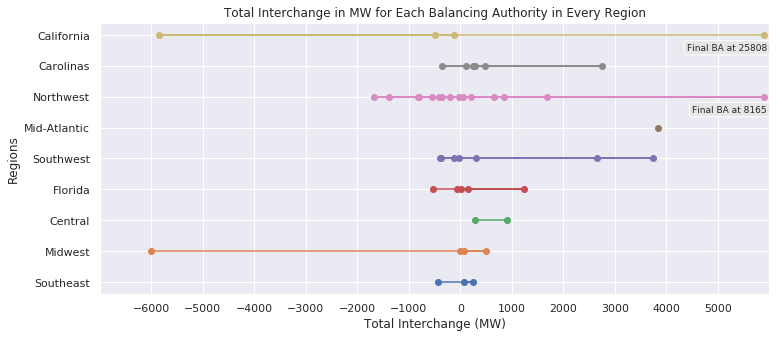

In [126]:
# This makes plots appear in the notebook
%matplotlib inline

def x_value(y,x):
    z = []
    for i in range(1,len(y)+1):
        z.append(x)
    return z 
        
#regions = ['California', 'Carolinas', 'Central', 'Florida', 'Mid-Atlantic', 'Midwest', 'Northwest', 'Southeast', 'Southwest']

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(ordered.loc[Southeast]['Total Interchange (MW)'], x_value(ordered.loc[Southeast]['Total Interchange (MW)'],'Southeast'), marker='o')
ax.plot(ordered.loc[Midwest]['Total Interchange (MW)'], x_value(ordered.loc[Midwest]['Total Interchange (MW)'],'Midwest'), marker='o')
ax.plot(ordered.loc[Central]['Total Interchange (MW)'], x_value(ordered.loc[Central]['Total Interchange (MW)'],'Central'), marker='o')
ax.plot(ordered.loc[Florida]['Total Interchange (MW)'], x_value(ordered.loc[Florida]['Total Interchange (MW)'],'Florida'), marker='o')
ax.plot(ordered.loc[Southwest]['Total Interchange (MW)'], x_value(ordered.loc[Southwest]['Total Interchange (MW)'],'Southwest'), marker='o')
ax.plot(ordered.loc[Mid_Atlantic]['Total Interchange (MW)'], x_value(ordered.loc[Mid_Atlantic]['Total Interchange (MW)'],'Mid-Atlantic'), marker='o')
ax.plot(Northwest_Corrected, x_value(ordered.loc[Northwest]['Total Interchange (MW)'],'Northwest'), marker='o')
ax.plot(Carolinas_Corrected, x_value(ordered.loc[Carolinas]['Total Interchange (MW)'],'Carolinas'), marker='o')
ax.plot(California_Corrected, x_value(ordered.loc[California]['Total Interchange (MW)'],'California'), marker='o')

# add legends
#leg = ax.legend()

plt.xlim(left=-7000,right=6000)

plt.xticks(range(-6000, 6000, 1000))

plt.title('Total Interchange in MW for Each Balancing Authority in Every Region');

# add x and y labels
ax.set_xlabel('Total Interchange (MW)')
ax.set_ylabel('Regions')

# Defining the text box identifying the true value of the largest bounding boxes. 
ax.annotate('Final BA at 25808',
             xy = (3000,7.7),xytext = (4400,7.5),
             bbox={'boxstyle':'round','fc':'0.9'},
             fontsize = 9,
            );

ax.annotate('Final BA at 8165',
             xy = (3000,7.7),xytext = (4500,5.5),
             bbox={'boxstyle':'round','fc':'0.9'},
             fontsize = 9,
            );

###  Question 5:
Does energy production from specific energy sources fluctuate throughout each day?  Week?  Month?

#### 1: Group Top 5 Balancing Authority Net Generation of Coal

In [127]:
electricity8=electricity[electricity['Balancing Authority'].isin(['MISO', 'PJM', 'SWPP', 'ERCO','SOCO'])]
electricity8.dropna(subset=['Net Generation (MW) from Coal'])### Groupby Top 5 Balancing Authority Net Generation of Coal

Balancing Authority  Data Date  Hour Number Local Time at End of Hour  \
69491                 ERCO 2019-01-01          1.0     01/01/2019 1:00:00 AM   
69492                 ERCO 2019-01-01          2.0     01/01/2019 2:00:00 AM   
69493                 ERCO 2019-01-01          3.0     01/01/2019 3:00:00 AM   
69494                 ERCO 2019-01-01          4.0     01/01/2019 4:00:00 AM   
69495                 ERCO 2019-01-01          5.0     01/01/2019 5:00:00 AM   
69496                 ERCO 2019-01-01          6.0     01/01/2019 6:00:00 AM   
69497                 ERCO 2019-01-01          7.0     01/01/2019 7:00:00 AM   
69498                 ERCO 2019-01-01          8.0     01/01/2019 8:00:00 AM   
69499                 ERCO 2019-01-01          9.0     01/01/2019 9:00:00 AM   
69500                 ERCO 2019-01-01         10.0    01/01/2019 10:00:00 AM   
69501                 ERCO 2019-01-01         11.0    01/01/2019 11:00:00 AM   
69502                 ERCO 2019-01-01         12.0    01/01/2019 12:00:00 PM   
69503                 ERCO 2019-01-01         13.0     01/01/2019 1:00:00 PM   
69504                 ERCO 2019-01-01         14.0     01/01/2019 2:00:00 PM   
69505                 ERCO 2019-01-01         15.0     01/01/2019 3:00:00 PM   
69506                 ERCO 2019-01-01         16.0     01/01/2019 4:00:00 PM   
69507                 ERCO 2019-01-01         17.0     01/01/2019 5:00:00 PM   
69508                 ERCO 2019-01-01         18.0     01/01/2019 6:00:00 PM   
69509                 ERCO 2019-01-01         19.0     01/01/2019 7:00:00 PM   
69510                 ERCO 2019-01-01         20.0     01/01/2019 8:00:00 PM   
69511                 ERCO 2019-01-01         21.0     01/01/2019 9:00:00 PM   
69512                 ERCO 2019-01-01         22.0    01/01/2019 10:00:00 PM   
69513                 ERCO 2019-01-01         23.0    01/01/2019 11:00:00 PM   
69514                 ERCO 2019-01-01         24.0    01/02/2019 12:00:00 AM   
69515                 ERCO 2019-01-02          1.0     01/02/2019 1:00:00 AM   
69516                 ERCO 2019-01-02          2.0     01/02/2019 2:00:00 AM   
69517                 ERCO 2019-01-02          3.0     01/02/2019 3:00:00 AM   
69518                 ERCO 2019-01-02          4.0     01/02/2019 4:00:00 AM   
69519                 ERCO 2019-01-02          5.0     01/02/2019 5:00:00 AM   
69520                 ERCO 2019-01-02          6.0     01/02/2019 6:00:00 AM   
...                    ...        ...          ...                       ...   
155274                SWPP 2019-10-26         19.0     10/26/2019 7:00:00 PM   
155275                SWPP 2019-10-26         20.0     10/26/2019 8:00:00 PM   
155276                SWPP 2019-10-26         21.0     10/26/2019 9:00:00 PM   
155277                SWPP 2019-10-26         22.0    10/26/2019 10:00:00 PM   
155278                SWPP 2019-10-26         23.0    10/26/2019 11:00:00 PM   
155279                SWPP 2019-10-26         24.0    10/27/2019 12:00:00 AM   
155280                SWPP 2019-10-27          1.0     10/27/2019 1:00:00 AM   
155281                SWPP 2019-10-27          2.0     10/27/2019 2:00:00 AM   
155282                SWPP 2019-10-27          3.0     10/27/2019 3:00:00 AM   
155283                SWPP 2019-10-27          4.0     10/27/2019 4:00:00 AM   
155284                SWPP 2019-10-27          5.0     10/27/2019 5:00:00 AM   
155285                SWPP 2019-10-27          6.0     10/27/2019 6:00:00 AM   
155286                SWPP 2019-10-27          7.0     10/27/2019 7:00:00 AM   
155287                SWPP 2019-10-27          8.0     10/27/2019 8:00:00 AM   
155288                SWPP 2019-10-27          9.0     10/27/2019 9:00:00 AM   
155289                SWPP 2019-10-27         10.0    10/27/2019 10:00:00 AM   
155290                SWPP 2019-10-27         11.0    10/27/2019 11:00:00 AM   
155291                SWPP 2019-10-27         12.0    10/27/2019 12:00:00 PM   
155292 

#### Weekly Net Generation (MW) from Coal

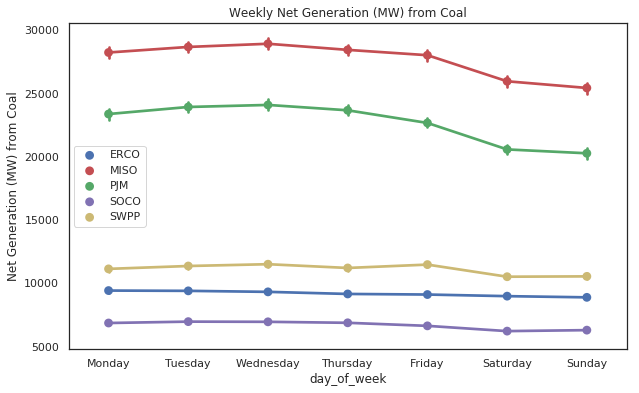

In [73]:
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="day_of_week",y="Net Generation (MW) from Coal", data=electricity8,hue="Balancing Authority",
                     palette={'MISO':'r', 'PJM':'g', 'SWPP':'y', 'ERCO':'b','SOCO':'m'},order=cats)
    g.legend(loc='best')
    g.set_title("Weekly Net Generation (MW) from Coal")

- Net Generation (MW) from Coal during weekdays for MISO and PJM both generate less during weekend
rest 3 balancing Authority are produce some amount energy.

#### Monthly Net Generation (MW) from Coal

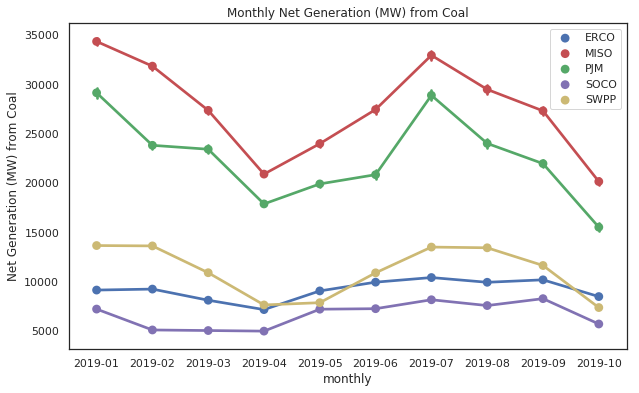

In [74]:
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="monthly",y="Net Generation (MW) from Coal", data=electricity8,hue="Balancing Authority",
                     palette={'MISO':'r', 'PJM':'g', 'SWPP':'y', 'ERCO':'b','SOCO':'m'})
    g.legend(loc='best')
    g.set_title("Monthly Net Generation (MW) from Coal")##plot Top 5 Balancing Authority Net Generation of coal

- Net Generation (MW) from Coal during months for MISO and PJM both generate most in months of Jan and July
rest 3 balancing Authority are also increased in these month.

#### Seasonal Net Generation (MW) from Coal

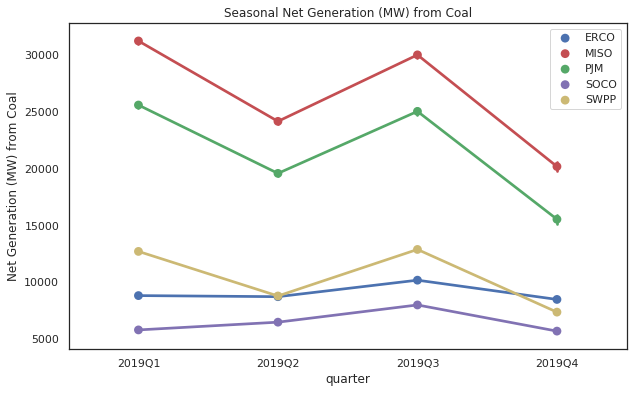

In [75]:
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="quarter",y="Net Generation (MW) from Coal", data=electricity8,hue="Balancing Authority",
                     palette={'MISO':'r', 'PJM':'g', 'SWPP':'y', 'ERCO':'b','SOCO':'m'})
    g.legend(loc='best')
    g.set_title("Seasonal Net Generation (MW) from Coal")

- For season changing are same pattern as monthly changing.

#### 2: Group Top 5 Balancing Authority Net Generation of Solar

In [76]:
electricity9=electricity[electricity['Balancing Authority'].isin(['CISO','IPCO','CPLE','ERCO','LDWP'])]
electricity9.dropna(subset=['Net Generation (MW) from Solar'])## Group Top 5 Balancing Authority Net Generation of Solar
electricity9

Balancing Authority  Data Date  Hour Number Local Time at End of Hour  \
34745                CISO 2019-01-01          1.0     01/01/2019 1:00:00 AM   
34746                CISO 2019-01-01          2.0     01/01/2019 2:00:00 AM   
34747                CISO 2019-01-01          3.0     01/01/2019 3:00:00 AM   
34748                CISO 2019-01-01          4.0     01/01/2019 4:00:00 AM   
34749                CISO 2019-01-01          5.0     01/01/2019 5:00:00 AM   
34750                CISO 2019-01-01          6.0     01/01/2019 6:00:00 AM   
34751                CISO 2019-01-01          7.0     01/01/2019 7:00:00 AM   
34752                CISO 2019-01-01          8.0     01/01/2019 8:00:00 AM   
34753                CISO 2019-01-01          9.0     01/01/2019 9:00:00 AM   
34754                CISO 2019-01-01         10.0    01/01/2019 10:00:00 AM   
34755                CISO 2019-01-01         11.0    01/01/2019 11:00:00 AM   
34756                CISO 2019-01-01         12.0    01/01/2019 12:00:00 PM   
34757                CISO 2019-01-01         13.0     01/01/2019 1:00:00 PM   
34758                CISO 2019-01-01         14.0     01/01/2019 2:00:00 PM   
34759                CISO 2019-01-01         15.0     01/01/2019 3:00:00 PM   
34760                CISO 2019-01-01         16.0     01/01/2019 4:00:00 PM   
34761                CISO 2019-01-01         17.0     01/01/2019 5:00:00 PM   
34762                CISO 2019-01-01         18.0     01/01/2019 6:00:00 PM   
34763                CISO 2019-01-01         19.0     01/01/2019 7:00:00 PM   
34764                CISO 2019-01-01         20.0     01/01/2019 8:00:00 PM   
34765                CISO 2019-01-01         21.0     01/01/2019 9:00:00 PM   
34766                CISO 2019-01-01         22.0    01/01/2019 10:00:00 PM   
34767                CISO 2019-01-01         23.0    01/01/2019 11:00:00 PM   
34768                CISO 2019-01-01         24.0    01/02/2019 12:00:00 AM   
34769                CISO 2019-01-02          1.0     01/02/2019 1:00:00 AM   
34770                CISO 2019-01-02          2.0     01/02/2019 2:00:00 AM   
34771                CISO 2019-01-02          3.0     01/02/2019 3:00:00 AM   
34772                CISO 2019-01-02          4.0     01/02/2019 4:00:00 AM   
34773                CISO 2019-01-02          5.0     01/02/2019 5:00:00 AM   
34774                CISO 2019-01-02          6.0     01/02/2019 6:00:00 AM   
...                   ...        ...          ...                       ...   
91962                LDWP 2019-10-27         19.0     10/27/2019 7:00:00 PM   
91963                LDWP 2019-10-27         20.0     10/27/2019 8:00:00 PM   
91964                LDWP 2019-10-27         21.0     10/27/2019 9:00:00 PM   
91965                LDWP 2019-10-27         22.0    10/27/2019 10:00:00 PM   
91966                LDWP 2019-10-27         23.0    10/27/2019 11:00:00 PM   
91967                LDWP 2019-10-27         24.0    10/28/2019 12:00:00 AM   
91968                LDWP 2019-10-28          1.0     10/28/2019 1:00:00 AM   
91969                LDWP 2019-10-28          2.0     10/28/2019 2:00:00 AM   
91970                LDWP 2019-10-28          3.0     10/28/2019 3:00:00 AM   
91971                LDWP 2019-10-28          4.0     10/28/2019 4:00:00 AM   
91972                LDWP 2019-10-28          5.0     10/28/2019 5:00:00 AM   
91973                LDWP 2019-10-28          6.0     10/28/2019 6:00:00 AM   
91974                LDWP 2019-10-28          7.0     10/28/2019 7:00:00 AM   
91975                LDWP 2019-10-28          8.0     10/28/2019 8:00:00 AM   
91976                LDWP 2019-10-28          9.0     10/28/2019 9:00:00 AM   
91977                LDWP 2019-10-28         10.0    10/28/2019 10:00:00 AM   
91978                LDWP 2019-10-28         11.0    10/28/2019 11:00:00 AM   
91979                LDWP 2019-10-28         12.0    10/28/2019 12:00:00 PM   
91980                LDWP 2019-10-28         13.0     10

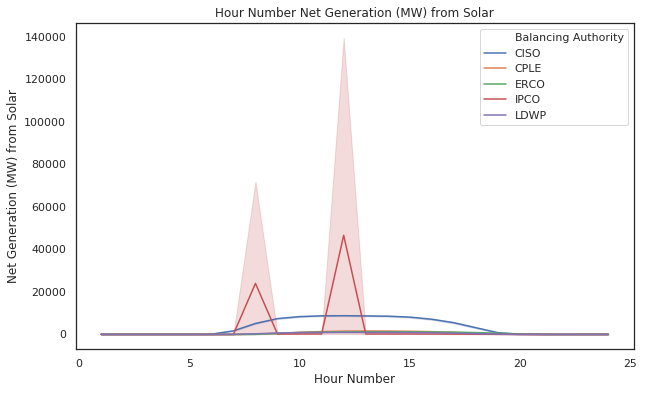

In [77]:
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.lineplot(x="Hour Number",y="Net Generation (MW) from Solar", data=electricity9,hue="Balancing Authority")
    g.legend(loc='best')

    g.set_title("Hour Number Net Generation (MW) from Solar")  ##plot Top 5 Balancing Authority Net Generation of solar

- Graph doest look correct ,there is might outline in data

In [78]:
electricity9.sort_values(by=["Net Generation (MW) from Solar"])
###sort the data to check if there is any outline 

Balancing Authority  Data Date  Hour Number Local Time at End of Hour  \
25310                CISO 2019-10-04         15.0     10/04/2019 3:00:00 PM   
25309                CISO 2019-10-04         14.0     10/04/2019 2:00:00 PM   
25304                CISO 2019-10-04          9.0     10/04/2019 9:00:00 AM   
25281                CISO 2019-10-03         10.0    10/03/2019 10:00:00 AM   
25305                CISO 2019-10-04         10.0    10/04/2019 10:00:00 AM   
25280                CISO 2019-10-03          9.0     10/03/2019 9:00:00 AM   
25306                CISO 2019-10-04         11.0    10/04/2019 11:00:00 AM   
25308                CISO 2019-10-04         13.0     10/04/2019 1:00:00 PM   
25282                CISO 2019-10-03         11.0    10/03/2019 11:00:00 AM   
25284                CISO 2019-10-03         13.0     10/03/2019 1:00:00 PM   
25307                CISO 2019-10-04         12.0    10/04/2019 12:00:00 PM   
25283                CISO 2019-10-03         12.0    10/03/2019 12:00:00 PM   
25279                CISO 2019-10-03          8.0     10/03/2019 8:00:00 AM   
25303                CISO 2019-10-04          8.0     10/04/2019 8:00:00 AM   
25255                CISO 2019-10-02          8.0     10/02/2019 8:00:00 AM   
37360                CISO 2019-04-20          1.0     04/20/2019 1:00:00 AM   
37361                CISO 2019-04-20          2.0     04/20/2019 2:00:00 AM   
25278                CISO 2019-10-03          7.0     10/03/2019 7:00:00 AM   
25302                CISO 2019-10-04          7.0     10/04/2019 7:00:00 AM   
25254                CISO 2019-10-02          7.0     10/02/2019 7:00:00 AM   
35590                CISO 2019-02-05          6.0     02/05/2019 6:00:00 AM   
35588                CISO 2019-02-05          4.0     02/05/2019 4:00:00 AM   
25032                CISO 2019-09-23          1.0     09/23/2019 1:00:00 AM   
35589                CISO 2019-02-05          5.0     02/05/2019 5:00:00 AM   
35586                CISO 2019-02-05          2.0     02/05/2019 2:00:00 AM   
35587                CISO 2019-02-05          3.0     02/05/2019 3:00:00 AM   
35580                CISO 2019-02-04         20.0     02/04/2019 8:00:00 PM   
35579                CISO 2019-02-04         19.0     02/04/2019 7:00:00 PM   
35583                CISO 2019-02-04         23.0    02/04/2019 11:00:00 PM   
35585                CISO 2019-02-05          1.0     02/05/2019 1:00:00 AM   
...                   ...        ...          ...                       ...   
83348                IPCO 2019-10-28         21.0     10/28/2019 9:00:00 PM   
83349                IPCO 2019-10-28         22.0    10/28/2019 10:00:00 PM   
83350                IPCO 2019-10-28         23.0    10/28/2019 11:00:00 PM   
83351                IPCO 2019-10-28         24.0    10/29/2019 12:00:00 AM   
91761                LDWP 2019-10-19         10.0    10/19/2019 10:00:00 AM   
91762                LDWP 2019-10-19         11.0    10/19/2019 11:00:00 AM   
91968                LDWP 2019-10-28          1.0     10/28/2019 1:00:00 AM   
91969                LDWP 2019-10-28          2.0     10/28/2019 2:00:00 AM   
91970                LDWP 2019-10-28          3.0     10/28/2019 3:00:00 AM   
91971                LDWP 2019-10-28          4.0     10/28/2019 4:00:00 AM   
91972                LDWP 2019-10-28          5.0     10/28/2019 5:00:00 AM   
91973                LDWP 2019-10-28          6.0     10/28/2019 6:00:00 AM   
91974                LDWP 2019-10-28          7.0     10/28/2019 7:00:00 AM   
91975                LDWP 2019-10-28          8.0     10/28/2019 8:00:00 AM   
91976                LDWP 2019-10-28          9.0     10/28/2019 9:00:00 AM   
91977                LDWP 2019-10-28         10.0    10/28/2019 10:00:00 AM   
91978                LDWP 2019-10-28         11.0    10/28/2019 11:00:00 AM   
91979                LDWP 2019-10-28         12.0    10/28/2019 12:00:00 PM   
91980                LDWP 2019-10-28         13.0     10

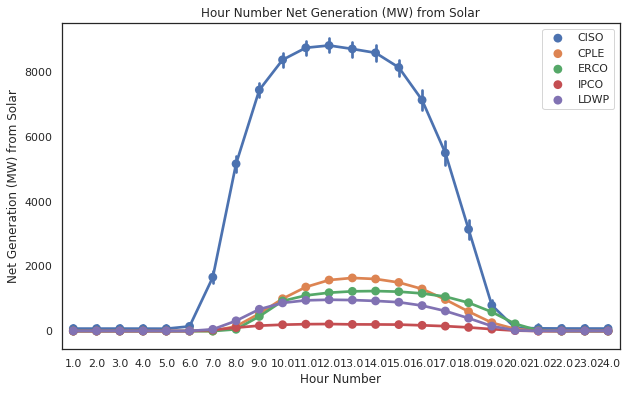

In [81]:
## find two outline of Net Generation (MW) from Solar and filter out these outline 
outline=electricity9[electricity9['Net Generation (MW) from Solar'] < 11050.0]
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="Hour Number",y="Net Generation (MW) from Solar", data=outline,hue="Balancing Authority")
    g.legend(loc='best')

    g.set_title("Hour Number Net Generation (MW) from Solar")  ##plot hourly Net Generation of solar

#### Now this graph make much more sense :)
- As we can see peak of Solar power exhibit is noon time, they dont produce any energy during nighttime

####  Plot Top 5 Balancing Authority with Net Generation of solar during weekdays

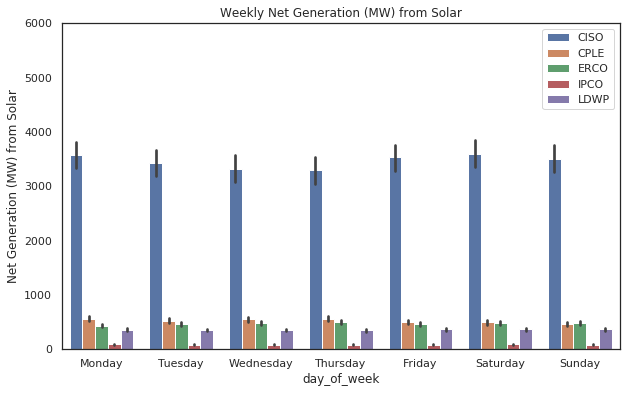

In [82]:
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] ## redindex monday to sunday
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.barplot(x="day_of_week",y="Net Generation (MW) from Solar", data=outline,hue="Balancing Authority",order=cats)
    g.legend(loc='best')
    g.set_ylim(0,6000)
    g.set_title("Weekly Net Generation (MW) from Solar")##plot Top 5 Balancing Authority Net Generation of solar weekdays

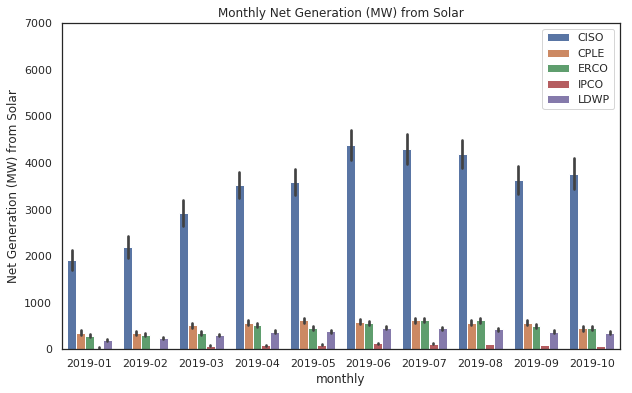

In [83]:
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.barplot(x="monthly",y="Net Generation (MW) from Solar", data=outline,hue="Balancing Authority")
    g.legend(loc='best')
    g.set_ylim(0,7000)
    g.set_title("Monthly Net Generation (MW) from Solar")##plot Top 5 Balancing Authority Net Generation of solar monthly

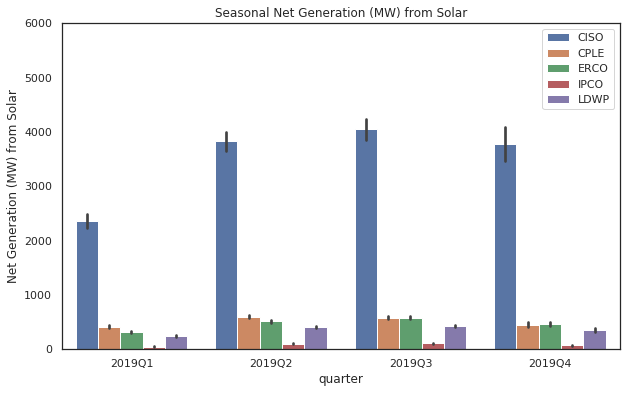

In [84]:
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.barplot(x="quarter",y="Net Generation (MW) from Solar", data=outline,hue="Balancing Authority")
    g.legend(loc='best')
    g.set_ylim(0,6000)
    g.set_title("Seasonal Net Generation (MW) from Solar")##plot Top 5 Balancing Authority Net Generation of solar seasonly

- Solar net generation also changing by month,peak months are June,July and August 

#### 3: Group Top 5 Balancing Authority Net Generation of Hydropower and Pumped Storage

In [85]:
## groupby top 5 Balancing Authority Net Generation of Hydropower and Pumped Storage
electricity10=electricity[electricity['Balancing Authority'].isin(['BPAT','CISO','NYIS','TVA','PJM'])]
electricity10.dropna(subset=['Net Generation (MW) from Hydropower and Pumped Storage'])  

Balancing Authority  Data Date  Hour Number Local Time at End of Hour  \
26059                 BPAT 2019-01-01          1.0     01/01/2019 1:00:00 AM   
26060                 BPAT 2019-01-01          2.0     01/01/2019 2:00:00 AM   
26061                 BPAT 2019-01-01          3.0     01/01/2019 3:00:00 AM   
26062                 BPAT 2019-01-01          4.0     01/01/2019 4:00:00 AM   
26063                 BPAT 2019-01-01          5.0     01/01/2019 5:00:00 AM   
26064                 BPAT 2019-01-01          6.0     01/01/2019 6:00:00 AM   
26065                 BPAT 2019-01-01          7.0     01/01/2019 7:00:00 AM   
26066                 BPAT 2019-01-01          8.0     01/01/2019 8:00:00 AM   
26067                 BPAT 2019-01-01          9.0     01/01/2019 9:00:00 AM   
26068                 BPAT 2019-01-01         10.0    01/01/2019 10:00:00 AM   
26069                 BPAT 2019-01-01         11.0    01/01/2019 11:00:00 AM   
26070                 BPAT 2019-01-01         12.0    01/01/2019 12:00:00 PM   
26071                 BPAT 2019-01-01         13.0     01/01/2019 1:00:00 PM   
26072                 BPAT 2019-01-01         14.0     01/01/2019 2:00:00 PM   
26073                 BPAT 2019-01-01         15.0     01/01/2019 3:00:00 PM   
26074                 BPAT 2019-01-01         16.0     01/01/2019 4:00:00 PM   
26075                 BPAT 2019-01-01         17.0     01/01/2019 5:00:00 PM   
26076                 BPAT 2019-01-01         18.0     01/01/2019 6:00:00 PM   
26077                 BPAT 2019-01-01         19.0     01/01/2019 7:00:00 PM   
26078                 BPAT 2019-01-01         20.0     01/01/2019 8:00:00 PM   
26079                 BPAT 2019-01-01         21.0     01/01/2019 9:00:00 PM   
26080                 BPAT 2019-01-01         22.0    01/01/2019 10:00:00 PM   
26081                 BPAT 2019-01-01         23.0    01/01/2019 11:00:00 PM   
26082                 BPAT 2019-01-01         24.0    01/02/2019 12:00:00 AM   
26083                 BPAT 2019-01-02          1.0     01/02/2019 1:00:00 AM   
26084                 BPAT 2019-01-02          2.0     01/02/2019 2:00:00 AM   
26085                 BPAT 2019-01-02          3.0     01/02/2019 3:00:00 AM   
26086                 BPAT 2019-01-02          4.0     01/02/2019 4:00:00 AM   
26087                 BPAT 2019-01-02          5.0     01/02/2019 5:00:00 AM   
26088                 BPAT 2019-01-02          6.0     01/02/2019 6:00:00 AM   
...                    ...        ...          ...                       ...   
172554                 TVA 2019-10-26         19.0     10/26/2019 7:00:00 PM   
172555                 TVA 2019-10-26         20.0     10/26/2019 8:00:00 PM   
172556                 TVA 2019-10-26         21.0     10/26/2019 9:00:00 PM   
172557                 TVA 2019-10-26         22.0    10/26/2019 10:00:00 PM   
172558                 TVA 2019-10-26         23.0    10/26/2019 11:00:00 PM   
172559                 TVA 2019-10-26         24.0    10/27/2019 12:00:00 AM   
172560                 TVA 2019-10-27          1.0     10/27/2019 1:00:00 AM   
172561                 TVA 2019-10-27          2.0     10/27/2019 2:00:00 AM   
172562                 TVA 2019-10-27          3.0     10/27/2019 3:00:00 AM   
172563                 TVA 2019-10-27          4.0     10/27/2019 4:00:00 AM   
172564                 TVA 2019-10-27          5.0     10/27/2019 5:00:00 AM   
172565                 TVA 2019-10-27          6.0     10/27/2019 6:00:00 AM   
172566                 TVA 2019-10-27          7.0     10/27/2019 7:00:00 AM   
172567                 TVA 2019-10-27          8.0     10/27/2019 8:00:00 AM   
172568                 TVA 2019-10-27          9.0     10/27/2019 9:00:00 AM   
172569                 TVA 2019-10-27         10.0    10/27/2019 10:00:00 AM   
172570                 TVA 2019-10-27         11.0    10/27/2019 11:00:00 AM   
172571                 TVA 2019-10-27         12.0    10/27/2019 12:00:00 PM   
172572 

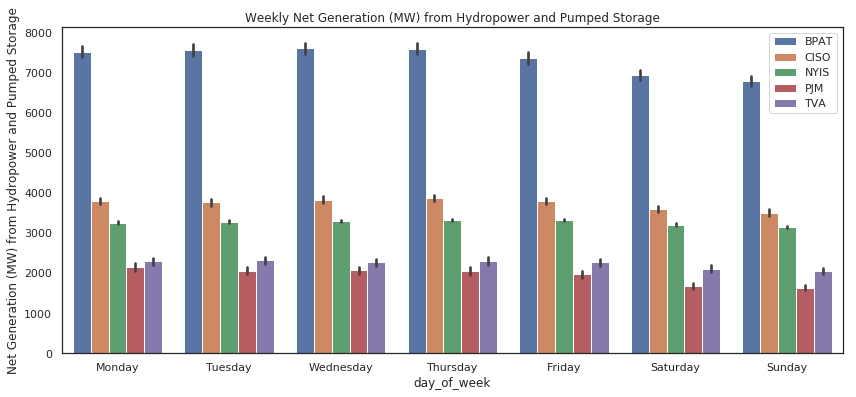

In [86]:
#reindex weekday from monday to sunday 
##plot Top 5 Balancing Authority Net Generation of Hydropower and Pumped Storage weekday
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
with sns.axes_style('white'):
    plt.figure(figsize=(14,6))
    g = sns.barplot(x="day_of_week",y="Net Generation (MW) from Hydropower and Pumped Storage", data=electricity10,hue="Balancing Authority",order=cats)
    g.legend(loc='best')
  
    g.set_title("Weekly Net Generation (MW) from Hydropower and Pumped Storage")


- Beside BPAT generate less during weekend,all rest balancing Authority have stable produations 
from Hydropower and Pumped Storage during weekdays.

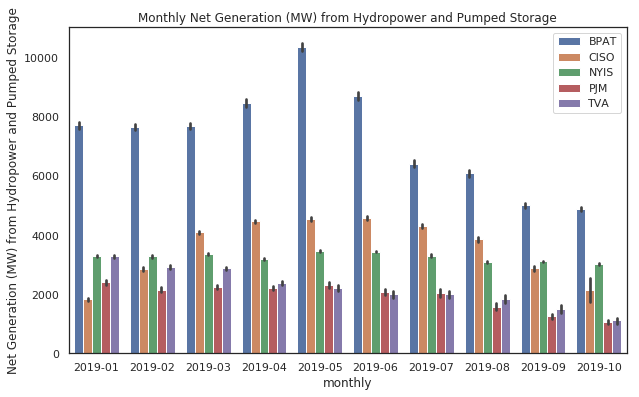

In [87]:
##plot Top 5 Balancing Authority Net Generation of Hydropower and Pumped Storage monthly
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.barplot(x="monthly",y="Net Generation (MW) from Hydropower and Pumped Storage", data=electricity10,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Monthly Net Generation (MW) from Hydropower and Pumped Storage")

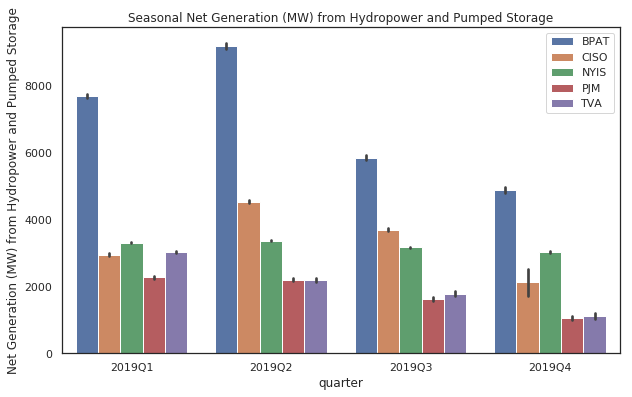

In [88]:
##plot Top 5 Balancing Authority Net Generation of Hydropower and Pumped Storage during seasonal
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.barplot(x="quarter",y="Net Generation (MW) from Hydropower and Pumped Storage", data=electricity10,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Seasonal Net Generation (MW) from Hydropower and Pumped Storage")

- As we can see net generation from Hydropower and Pumped Storage follow month by curve line
With the water amount increase during April and May,the hydropower produce more energy 
with weather get hoter and less water ,they produe less


#### 4: Group Top 5 Balancing Authority Net Generation of Gas

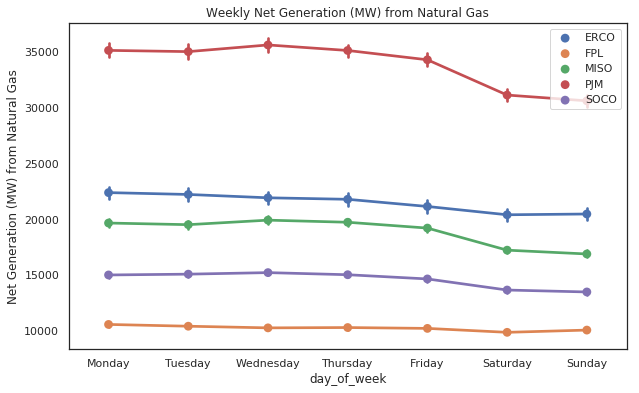

In [89]:
##Group Top 5 Balancing Authority Net Generation of Gas
electricity11=electricity[electricity['Balancing Authority'].isin(['PJM','ERCO','MISO','SOCO','FPL'])]
electricity11.dropna(subset=['Net Generation (MW) from Natural Gas'])
#reindex weekday from monday to sunday 
##plot Top 5 Balancing Authority Net Generation of gas weekday
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="day_of_week",y="Net Generation (MW) from Natural Gas", data=electricity11,hue="Balancing Authority",order=cats)
    g.legend(loc='best')
  
    g.set_title("Weekly Net Generation (MW) from Natural Gas")

- Beside FPL and MISO generate less during weekend,all rest balancing Authority have stable generations from gas during weekdays.

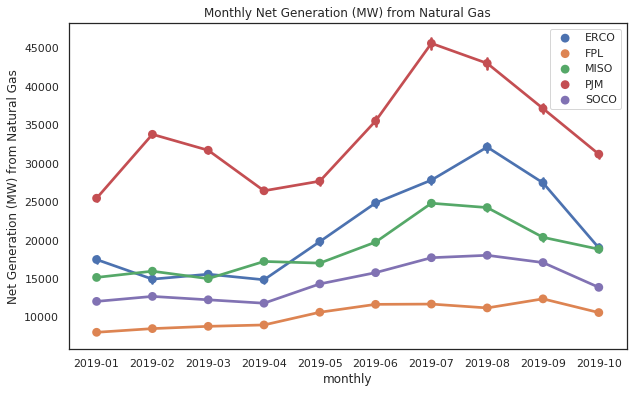

In [90]:
##plot Top 5 Balancing Authority Net Generation of gas duirng monthly
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="monthly",y="Net Generation (MW) from Natural Gas", data=electricity11,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Monthly Net Generation (MW) from Natural Gas")

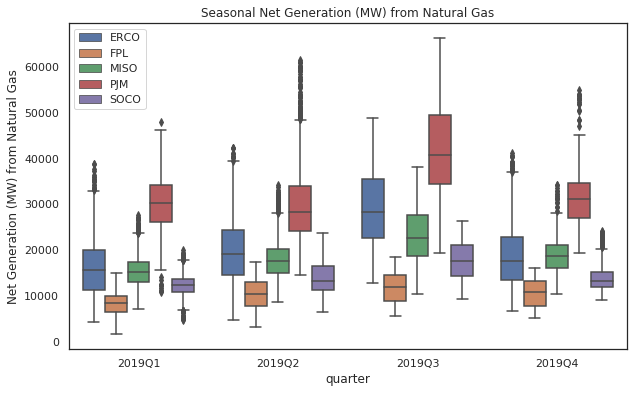

In [91]:
##plot Top 5 Balancing Authority Net Generation of gas during seasonly 
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.boxplot(x="quarter",y="Net Generation (MW) from Natural Gas", data=electricity11,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Seasonal Net Generation (MW) from Natural Gas")

- Net Generation (MW) from Gas during months,all balancing authorities generate most between months of July August 
and peak at Q3.

#### 5: Group Top 5 Balancing Authority Net Generation of Nuclear

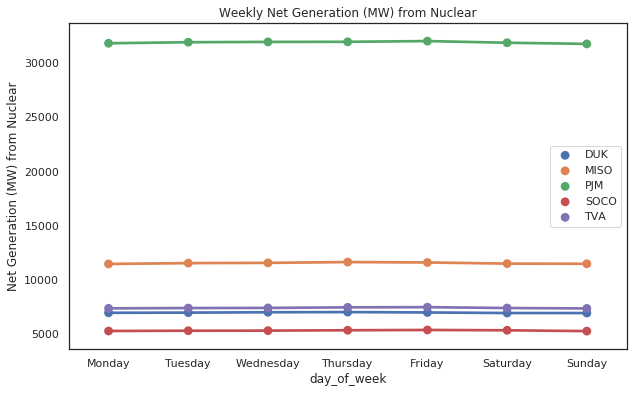

In [92]:
##  Group Top 5 Balancing Authority Net Generation of Nuclear
electricity12=electricity[electricity['Balancing Authority'].isin(['PJM','MISO','TVA','DUK','SOCO'])]
electricity12.dropna(subset=['Net Generation (MW) from Nuclear'])
#reindex weekday from monday to sunday 
##plot Top 5 Balancing Authority Net Generation of Nuclear weekday
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="day_of_week",y="Net Generation (MW) from Nuclear", data=electricity12,hue="Balancing Authority",order=cats)
    g.legend(loc='best')
  
    g.set_title("Weekly Net Generation (MW) from Nuclear")

- Nuclear have stable produations thought out weekdays

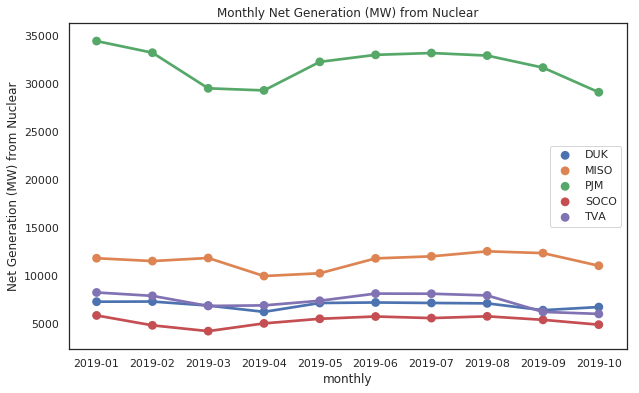

In [93]:
##plot Top 5 Balancing Authority Net Generation of Nuclear monthly
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="monthly",y="Net Generation (MW) from Nuclear", data=electricity12,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Monthly Net Generation (MW) from Nuclear")

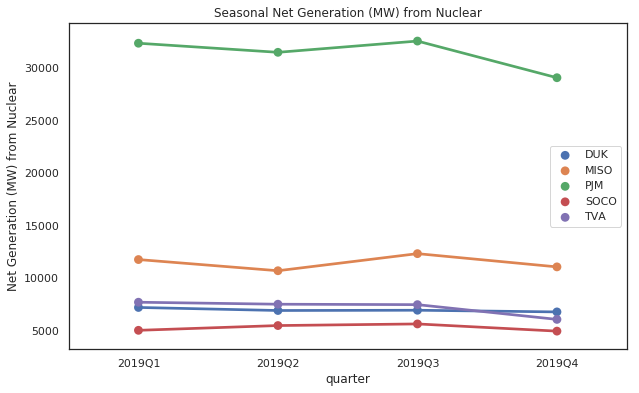

In [94]:
##plot Top 5 Balancing Authority Net Generation of Nuclear seasonly
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="quarter",y="Net Generation (MW) from Nuclear", data=electricity12,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Seasonal Net Generation (MW) from Nuclear")

- Nulear generation decline during Q2(March and April) and peak at Q4 (July and August)

#### 6 :Plot Top 5 Balancing Authority Net Generation of Wind

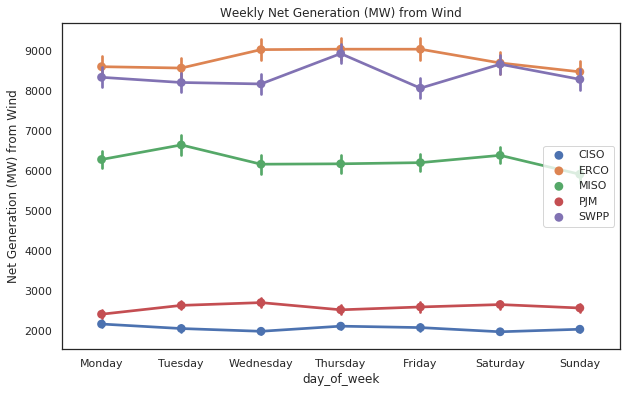

In [95]:
##Groupby Top 5 Balancing Authority Net Generation of Wind
electricity13=electricity[electricity['Balancing Authority'].isin(['ERCO','SWPP','MISO','PJM','CISO'])]
electricity13.dropna(subset=['Net Generation (MW) from Wind'])
#reindex weekday from monday to sunday 
##plot Top 5 Balancing Authority Net Generation of wind weekday
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="day_of_week",y="Net Generation (MW) from Wind", data=electricity13,hue="Balancing Authority",order=cats)
    g.legend(loc='best')
  
    g.set_title("Weekly Net Generation (MW) from Wind")

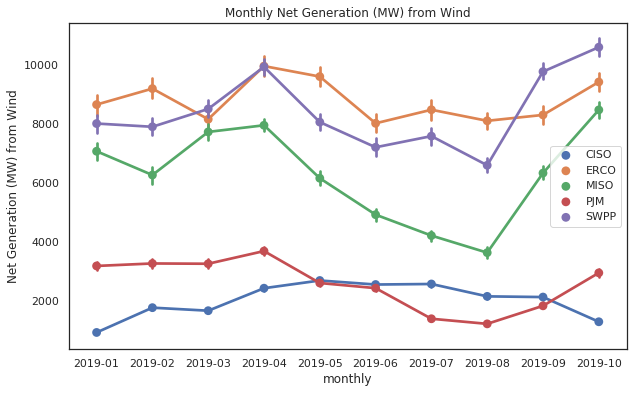

In [96]:
##plot Top 5 Balancing Authority Net Generation of wind monthly
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="monthly",y="Net Generation (MW) from Wind", data=electricity13,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Monthly Net Generation (MW) from Wind")

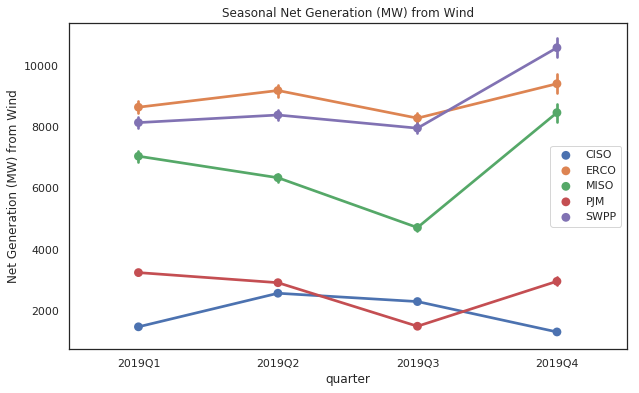

In [97]:
##plot Top 5 Balancing Authority Net Generation of Wind seasonal
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="quarter",y="Net Generation (MW) from Wind", data=electricity13,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Seasonal Net Generation (MW) from Wind")

- The changing pattern of generation wind power,for each balancing authority has different pattern though out
days ,months and season.


#### 7 :Plot Top 5 Balancing Authority Net Generation of All Petroleum Products

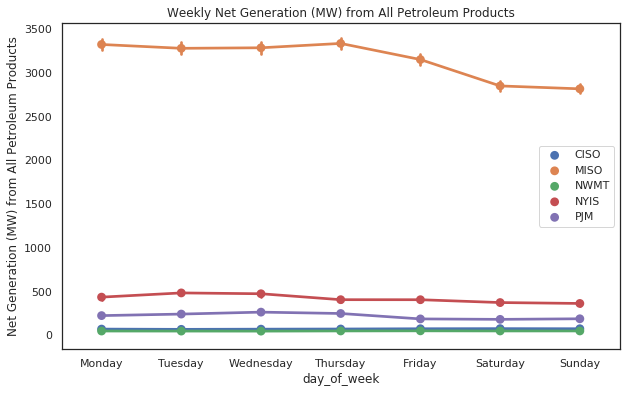

In [98]:
electricity14=electricity[electricity['Balancing Authority'].isin(['MISO','NYIS','PJM','CISO','NWMT'])]
electricity14.dropna(subset=['Net Generation (MW) from All Petroleum Products'])
#reindex weekday from monday to sunday 
##plot Top 5 Balancing Authority Net Generation of All Petroleum Products weekday
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="day_of_week",y="Net Generation (MW) from All Petroleum Products", data=electricity14,hue="Balancing Authority",order=cats)
    g.legend(loc='best')
  
    g.set_title("Weekly Net Generation (MW) from All Petroleum Products")

- For Net Generation of All Petroleum Products,only MISO generate less during weekend ,rest are stable produce.

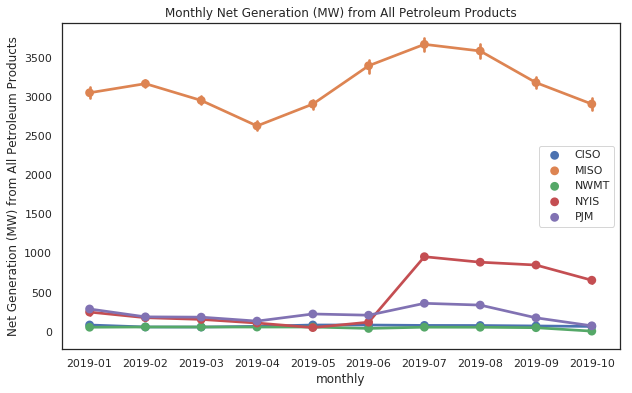

In [99]:
##plot Top 5 Balancing Authority Net Generation of All Petroleum Products monthly
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="monthly",y="Net Generation (MW) from All Petroleum Products", data=electricity14,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Monthly Net Generation (MW) from All Petroleum Products")

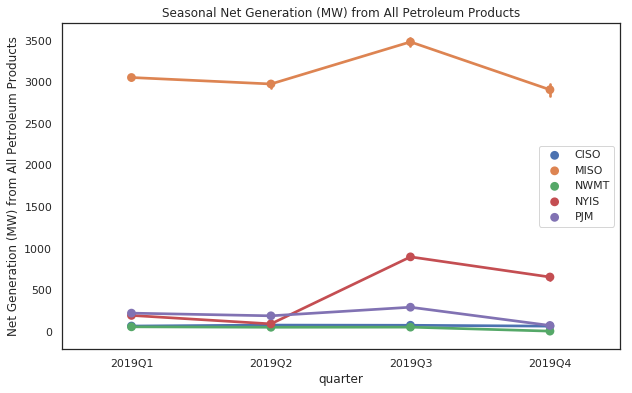

In [100]:
##plot Top 5 Balancing Authority Net Generation of All Petroleum Products seasonal
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.pointplot(x="quarter",y="Net Generation (MW) from All Petroleum Products", data=electricity14,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Seasonal Net Generation (MW) from All Petroleum Products")

- For Net Generation of All Petroleum Products, MISO,NYIS and PJM peak generate at Q3 ,rest are stable produce.

 ####  Top 5 Baclacing Authority Net Generation (MW) from Other Fuel Sources

In [101]:
electricity15=electricity1.groupby('Balancing Authority')['Net Generation (MW) from Other Fuel Sources'].mean().sort_values(ascending=False).head(5)
electricity15.dropna()

Balancing Authority
PJM     1671.741935
FPL     1654.921453
CPLE    1015.099559
MISO     833.359555
IPCO     727.006016
Name: Net Generation (MW) from Other Fuel Sources, dtype: float64

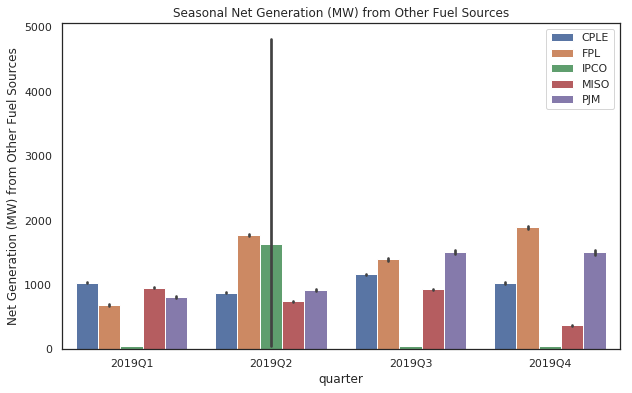

In [102]:
electricity16=electricity[electricity['Balancing Authority'].isin(['PJM','FPL','CPLE','MISO','IPCO'])]
electricity16.dropna(subset=['Net Generation (MW) from Other Fuel Sources'])
##plot Top 5 Balancing Authority Net Generation of other fuel sources  seasonal
with sns.axes_style('white'):
    plt.figure(figsize=(10,6))
    g = sns.barplot(x="quarter",y="Net Generation (MW) from Other Fuel Sources", data=electricity16,hue="Balancing Authority")
    g.legend(loc='best')
  
    g.set_title("Seasonal Net Generation (MW) from Other Fuel Sources")

- For The energy generate from other fuel sources,since the amount of productions are small so I decide only look into  the seasonal changing pattern,each Balancing Authority has difference peak power generation.

### Question 6 [Bonus Question] -  Are there specific regions with consistent negative interchanges that have high potential for supplemental solar or wind energy installation?

To answer this question, we are going to compare the solar irradiance and wind maps with the total neagtive interchange maps.

First let us look at the table we created for Top 5 total negative interchange..

In [103]:
#Top 5 with negative interchange

intertail

Total Interchange (MW)   Demand (MW)  \
Balancing Authority                                         
PGE                            -1669.908131   2301.441985   
ISNE                           -2513.544255  13483.306100   
NYIS                           -2931.740381  17921.789971   
CISO                           -5868.658598  24660.568480   
MISO                           -6001.474722  74745.682090   

                     Net Generation (MW)       lon      lat  
Balancing Authority                                          
PGE                           640.320457 -120.7401  47.7511  
ISNE                        10969.761845  -70.8227  43.9654  
NYIS                        14990.049590  -74.0060  40.7128  
CISO                        17905.581349 -119.4179  36.7783  
MISO                        69776.039183  -94.6859  46.7296

In order to scale the size of the scatter plot based on the interchange values, negative number are converted into positive.

In [104]:
#Taking the absolute value of the interchange
intertail_abs = intertail['Total Interchange (MW)'].abs()
intertail_abs

Balancing Authority
PGE     1669.908131
ISNE    2513.544255
NYIS    2931.740381
CISO    5868.658598
MISO    6001.474722
Name: Total Interchange (MW), dtype: float64

In our table, the Balancing Authorities are displayed as index of the table and it cannot be referenced in a scatter plot. So we are extracting the index values and displaying it in a seperate column for future use.

In [105]:
#Extracting the index to use it as a text in the map

intertail['Balancing Authority'] = intertail.index
intertail

Total Interchange (MW)   Demand (MW)  \
Balancing Authority                                         
PGE                            -1669.908131   2301.441985   
ISNE                           -2513.544255  13483.306100   
NYIS                           -2931.740381  17921.789971   
CISO                           -5868.658598  24660.568480   
MISO                           -6001.474722  74745.682090   

                     Net Generation (MW)       lon      lat  \
Balancing Authority                                           
PGE                           640.320457 -120.7401  47.7511   
ISNE                        10969.761845  -70.8227  43.9654   
NYIS                        14990.049590  -74.0060  40.7128   
CISO                        17905.581349 -119.4179  36.7783   
MISO                        69776.039183  -94.6859  46.7296   

                    Balancing Authority  
Balancing Authority                      
PGE                                 PGE  
ISNE                               ISNE  
NYIS                               NYIS  
CISO                               CISO  
MISO                               MISO

Below is the code to display a side by side comparison of the top 5 negative interchange areas and the amounts of solar irradiance received by all the places in the united states.

/opt/anaconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


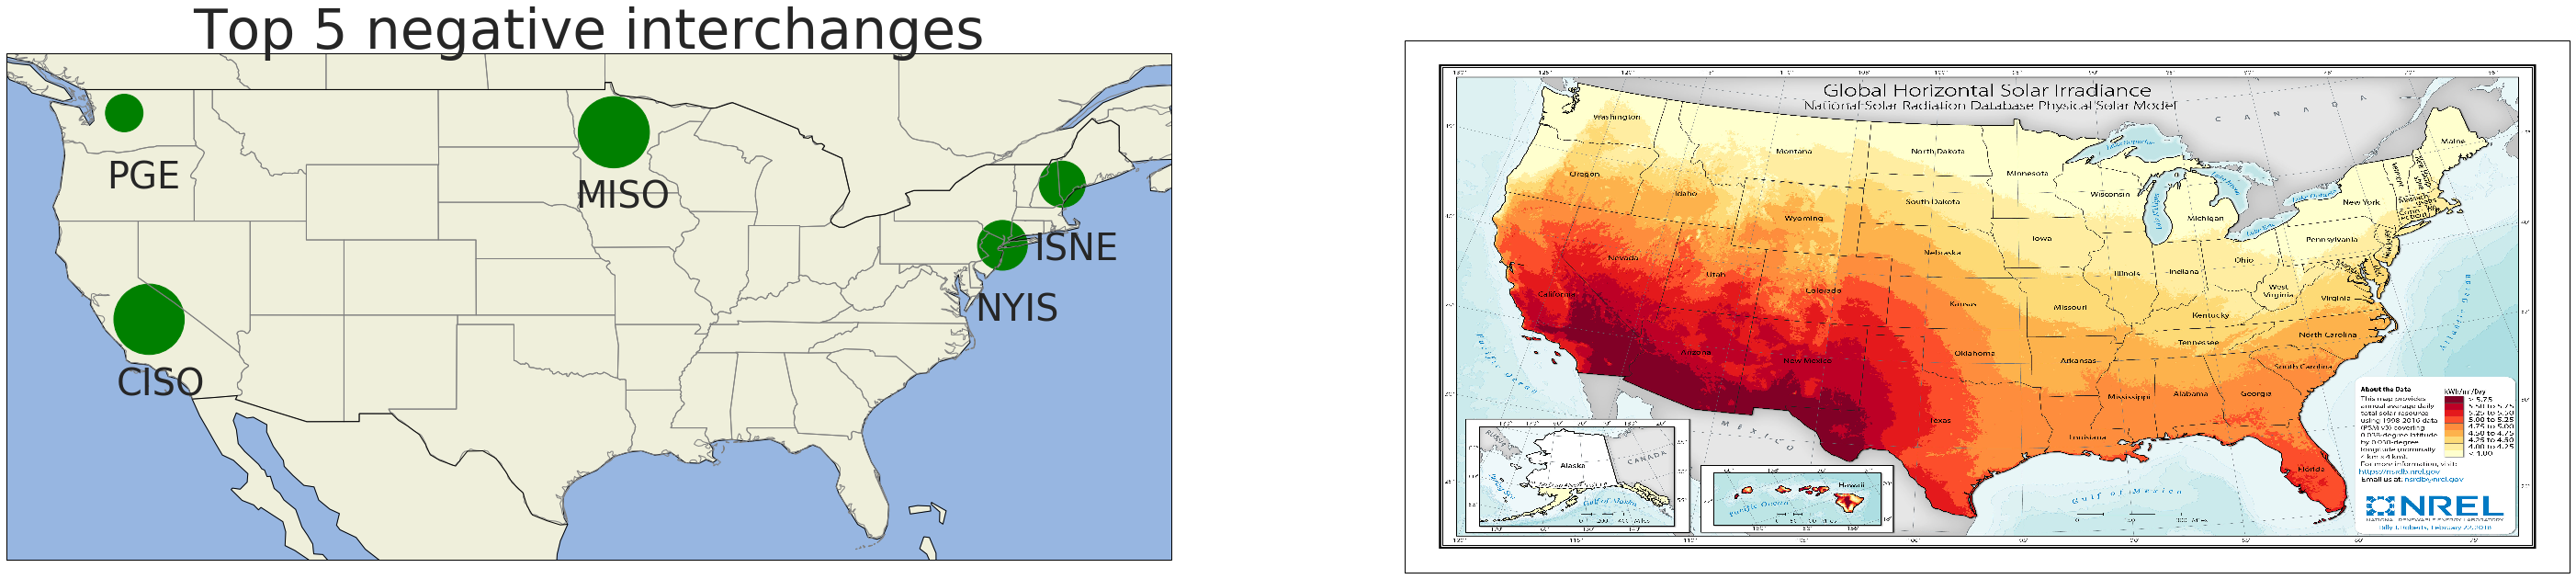

In [106]:
#Mapping the top 5 negative interchanges and comparing it with the direct solar irradiance map

import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, BORDERS, OCEAN
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cv2
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from scipy import ndimage, misc

# Set the size to 12, 20
fig, ax = plt.subplots(figsize=(50,100),ncols=2, subplot_kw=dict(projection=ccrs.PlateCarree()))
ax1 , ax2 = ax


# use underlay image to the map
#ax1.stock_img()

ax1.set_extent([-127, -65, 24, 47])

# display land and coastline
ax1.add_feature(LAND)
ax1.add_feature(COASTLINE)
ax1.add_feature(OCEAN)

# State borders
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax1.add_feature(states, edgecolor='gray')
fig

# display the country border lines
ax1.add_feature(BORDERS)

im = ax1.scatter(intertail['lon'], intertail['lat'],s=intertail_abs, marker='o', c='green');

lat = intertail['lat']
lon = intertail['lon']
ba = intertail['Balancing Authority']

dict1={}
list1=[]
list2=[]
list3=[]
n=0
#storing each value in different lists
for z in lat:
    list1.append(z)
for c in lon:
    list2.append(c)
for b in ba:
    list3.append(b)
#storing the values of lat long in a dictionary with lat as keys and long as values    
while(n<len(list1)):
    dict1[list1[n]]=list2[n]
    n+=1
i=0
for z,c in dict1.items():
    ax1.text(c+3,z-4,list3[i],horizontalalignment='right', fontsize=40)
    i+=1

ax1.set_title('Top 5 negative interchanges',fontsize=60)

# #importing image
img = plt.imread("../pythonproject/solar.jpg")
rotated_img = ndimage.rotate(img, 180)
horizontal_img = cv2.flip(rotated_img, 1 )
ax2.imshow(horizontal_img, extent=[-127, -70, 24, 50]);


It is clear from this map that 4 out of the 5 balancing authorities with a high inflow lie on the regions with low solar irradiance. Let us now look at the top 5 regions in net generation based on solar power.

In [108]:
solar5['Balancing Authority'] = solar5.index
solar5

Total Interchange (MW)   Demand (MW)  \
Balancing Authority                                         
CISO                           -5868.658598  24660.568480   
IPCO                            -271.599721   1501.303372   
CPLE                             245.121644   7172.765660   
ERCO                             -61.965849  44832.808223   
LDWP                            -495.292503   3109.910396   

                     Net Generation (MW)  Net Generation (MW) from Solar  \
Balancing Authority                                                        
CISO                        17905.581349                     3462.488729   
IPCO                         4479.607999                     3014.523551   
CPLE                         7719.036214                      523.798238   
ERCO                        44771.704669                      472.608223   
LDWP                         2614.608974                      359.758082   

                          lon      lat Balancing Authority  
Balancing Authority                                         
CISO                -119.4179  36.7783                CISO  
IPCO                -120.7401  47.7511                IPCO  
CPLE                 -79.0193  35.7596                CPLE  
ERCO                 -99.9010  31.9680                ERCO  
LDWP                -119.4179  36.7783                LDWP

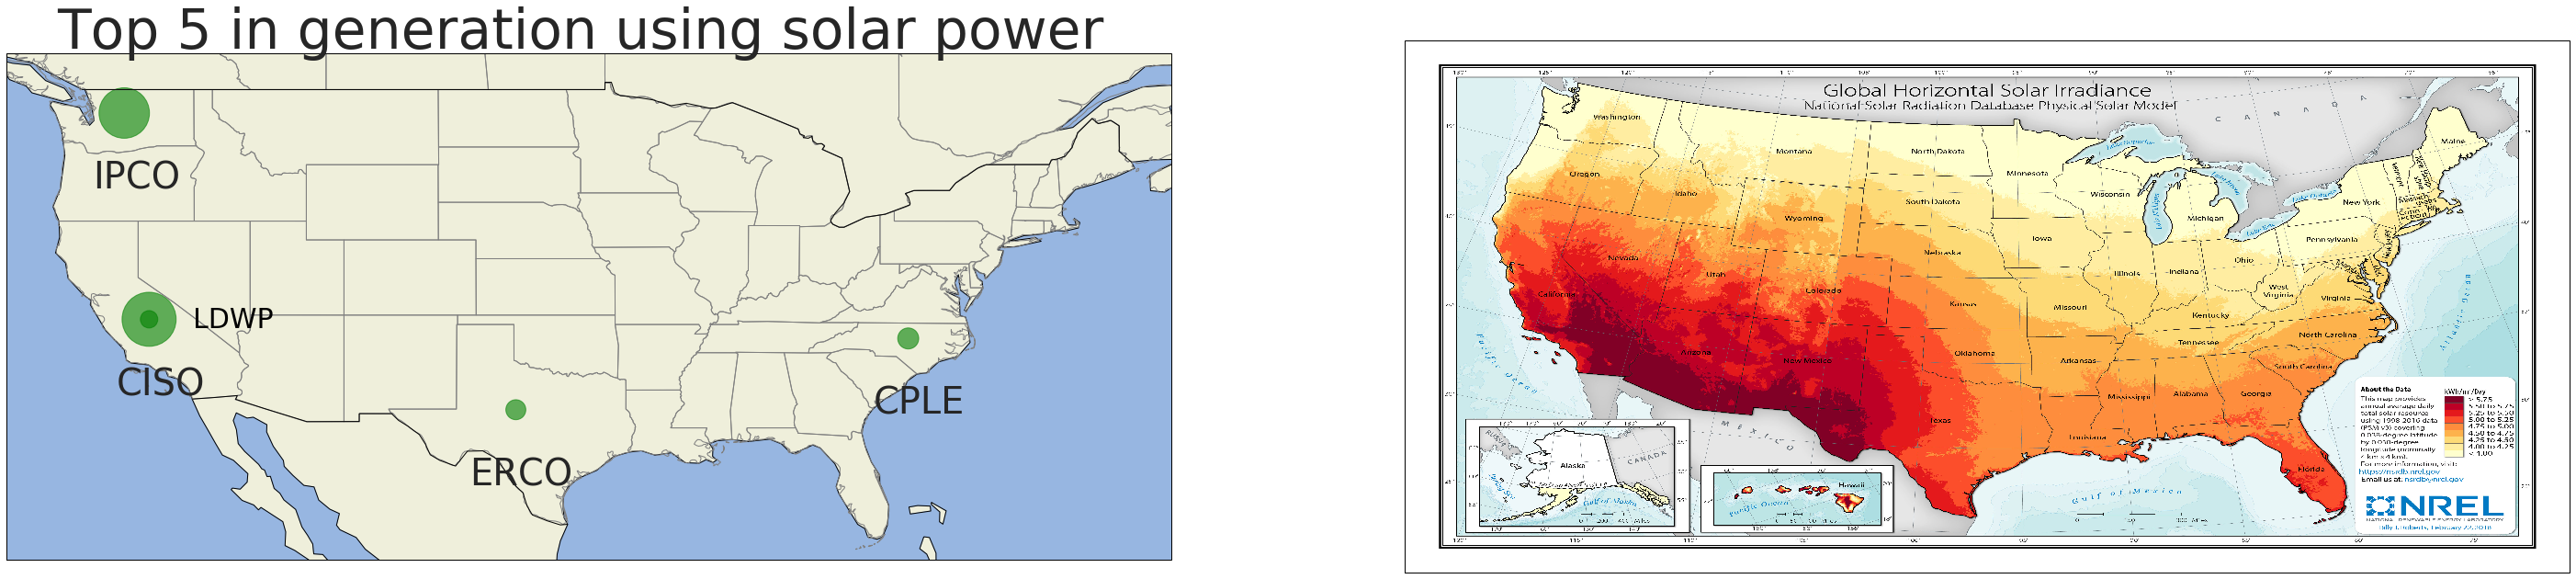

In [109]:
#Mapping the top 5 in generation based on solar power and comparing it with the direct solar irradiance map


fig, ax = plt.subplots(figsize=(50,50),ncols=2, subplot_kw=dict(projection=ccrs.PlateCarree()))


ax1,ax2 = ax
ax1.set_extent([-127, -65, 24, 47])

# use underlay image to the map
#ax1.stock_img()

# display land and coastline
ax1.add_feature(LAND)
ax1.add_feature(COASTLINE)
ax1.add_feature(OCEAN)

# # State borders
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax1.add_feature(states, edgecolor='gray')
fig

# # display the country border lines
ax1.add_feature(BORDERS)

im = ax1.scatter(solar5['lon'], solar5['lat'],solar5['Net Generation (MW) from Solar'], marker='o', c='green',
                   alpha=0.6)
lat_s = solar5['lat']
lon_s = solar5['lon']
ba_s = solar5['Balancing Authority']

dict2={}
list11=[]
list22=[]
list33=[]
n=0
#storing each value in different lists
for z in lat_s:
    list11.append(z)
for c in lon_s:
    list22.append(c)
for b in ba_s:
    list33.append(b)
#storing the values of lat long in a dictionary with lat as keys and long as values    
while(n<len(list1)):
    dict2[list11[n]]=list22[n]
    n+=1
i=0
for z,c in dict2.items():
    ax1.text(c+3,z-4,list33[i],horizontalalignment='right', fontsize=40);
    i+=1
ax1.text(0.16,0.5,'LDWP',
        
       verticalalignment='top',
        
       transform = ax1.transAxes,
        
       color='black', fontsize=30);
ax1.set_title('Top 5 in generation using solar power ',fontsize=60)

# #importing image
img = plt.imread("../pythonproject/solar.jpg")
rotated_img = ndimage.rotate(img, 180)
horizontal_img = cv2.flip(rotated_img, 1 )
ax2.imshow(horizontal_img, extent=[-127, -70, 24, 50])

It is clear from these maps that california region thrives in electricity generation using solar energy but it still has a very high negative interchange, meaning it has a consistently high demand. To satisfy this demand, it borrows power from northwest and southwest regions which are also places of high solar irradiance. One of the suggestions to meet the power demand in the west is to set up more solar farms in the nevada desert region and other western states like Utah, Arizona, New Mexico, Colorado, Texas, Oklahoma which receive high amounts of irradiance throughout the year.

Now let us look at the wind power vs top 5 negative interchange maps..

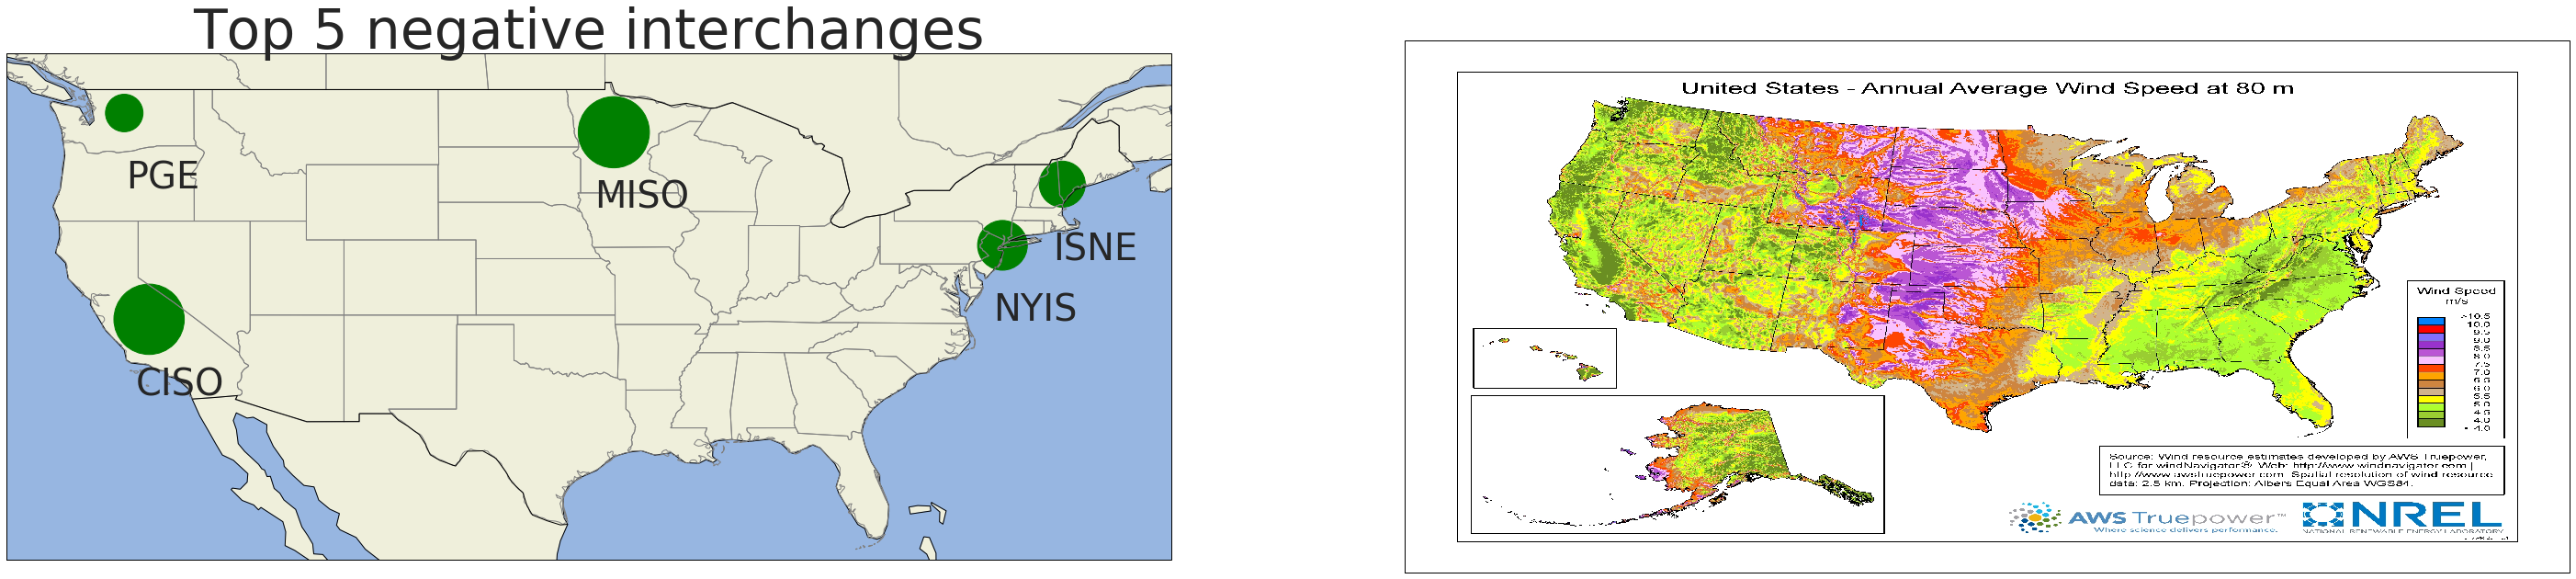

In [110]:
#Mapping the top 5 negative interchanges and comparing it with the annual average wind speed at 80m


fig, ax = plt.subplots(figsize=(50,80),ncols=2, subplot_kw=dict(projection=ccrs.PlateCarree()))


ax1,ax2 = ax
ax1.set_extent([-127, -65, 24, 47])

# use underlay image to the map
#ax1.stock_img()

# display land and coastline
ax1.add_feature(LAND)
ax1.add_feature(COASTLINE)
ax1.add_feature(OCEAN)

# # State borders
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax1.add_feature(states, edgecolor='gray')
fig

# # display the country border lines
ax1.add_feature(BORDERS)

im = ax1.scatter(intertail['lon'], intertail['lat'],intertail_abs, marker='o', c='green'
                   )
lat = intertail['lat']
lon = intertail['lon']
ba = intertail['Balancing Authority']

dict1={}
list1=[]
list2=[]
list3=[]
n=0
#storing each value in different lists
for z in lat:
    list1.append(z)
for c in lon:
    list2.append(c)
for b in ba:
    list3.append(b)
#storing the values of lat long in a dictionary with lat as keys and long as values    
while(n<len(list1)):
    dict1[list1[n]]=list2[n]
    n+=1
i=0
for z,c in dict1.items():
    ax1.text(c+4,z-4,list3[i],horizontalalignment='right', fontsize=40);
    i+=1

ax1.set_title('Top 5 negative interchanges',fontsize=60)

# #importing image
img = plt.imread("../pythonproject/wind.jpg")
rotated_img = ndimage.rotate(img, 180)
horizontal_img = cv2.flip(rotated_img, 1 )
ax2.imshow(horizontal_img, extent=[-127, -70, 24, 50])

The map on the left is the top 5 regions with high negative interchange and the right image shows the annual average wind speed received at a height of 80m above ground. Most utility level wind turbines have rotors at a height anywhere between 25m and 100m above ground and they require an average wind speed of 6m/s. Based on this fact, most of the regions marked in orange, brown and violet are suitable for utility scale wind farms. 

In [111]:
wind5['Balancing Authority'] = wind5.index
wind5

Total Interchange (MW)   Demand (MW)  \
Balancing Authority                                         
ERCO                             -61.965849  44832.808223   
SWPP                             281.142021  31068.629003   
MISO                           -6001.474722  74745.682090   
PJM                             3840.360000  91910.197073   
CISO                           -5868.658598  24660.568480   

                     Net Generation (MW)  Net Generation (MW) from Wind  \
Balancing Authority                                                       
ERCO                        44771.704669                    8772.502160   
SWPP                        31339.108516                    8375.468432   
MISO                        69776.039183                    6247.546617   
PJM                         94575.979928                    2582.440061   
CISO                        17905.581349                    2055.438047   

                          lon      lat Balancing Authority  
Balancing Authority                                         
ERCO                 -99.9010  31.9680                ERCO  
SWPP                 -98.4842  39.0119                SWPP  
MISO                 -94.6859  46.7296                MISO  
PJM                  -77.1945  41.2033                 PJM  
CISO                -119.4179  36.7783                CISO

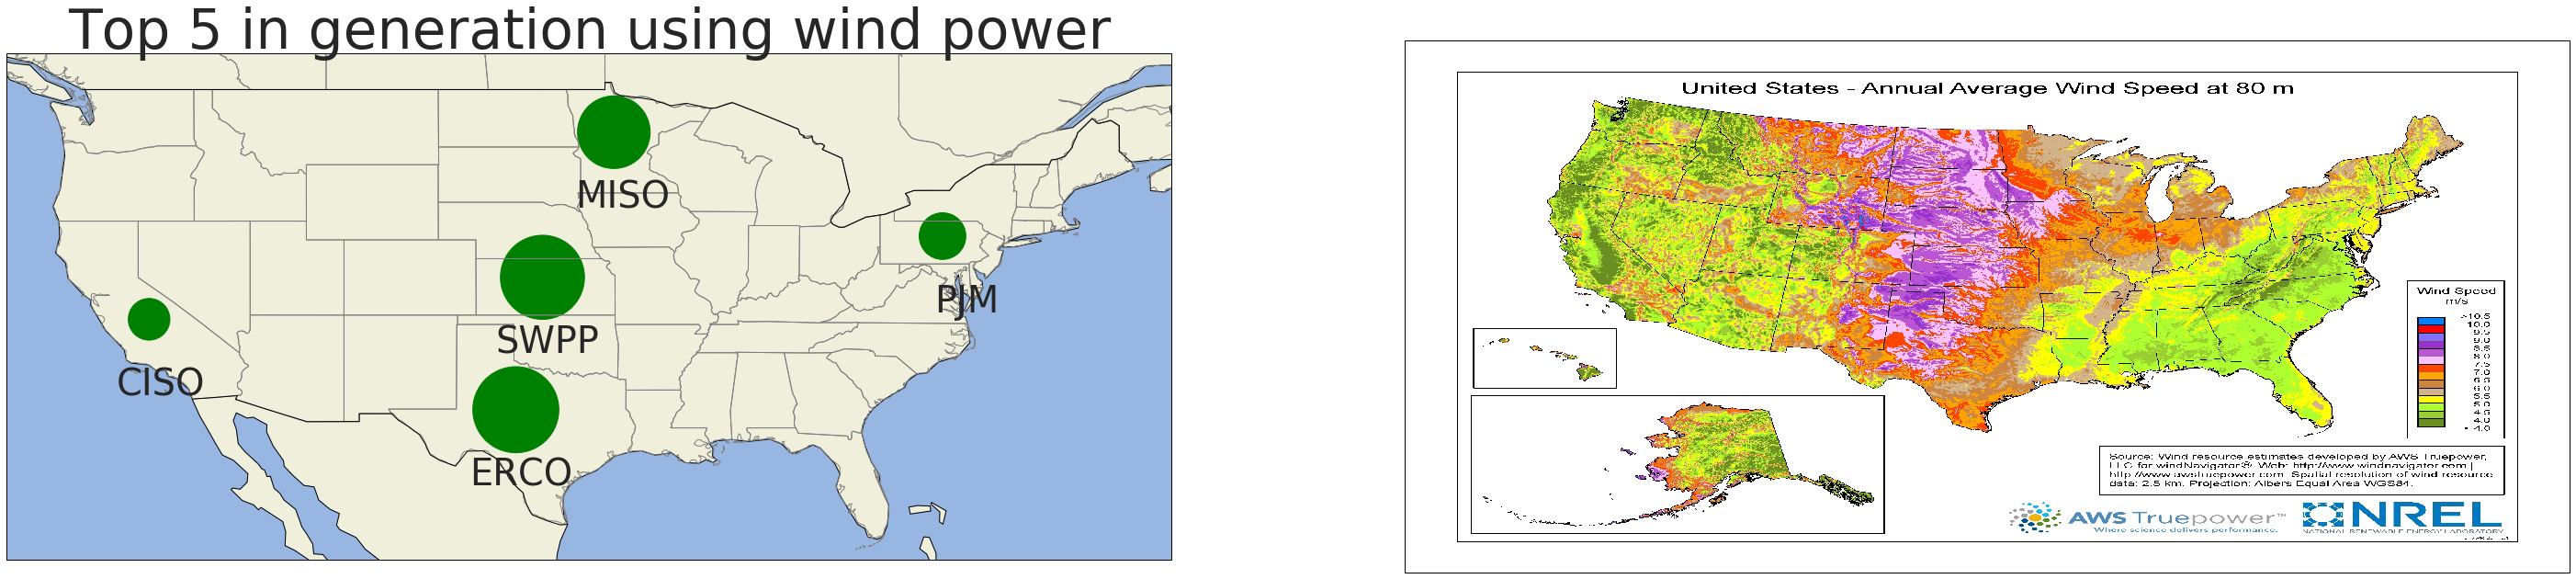

In [113]:
#Mapping the top 5 in generation based on wind power and comparing it with the annual average wind speed at 80m

fig, ax = plt.subplots(figsize=(50,80),ncols=2, subplot_kw=dict(projection=ccrs.PlateCarree()))


ax1,ax2 = ax
ax1.set_extent([-127, -65, 24, 47])

# use underlay image to the map
#ax1.stock_img()

# display land and coastline
ax1.add_feature(LAND)
ax1.add_feature(COASTLINE)
ax1.add_feature(OCEAN)

# # State borders
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax1.add_feature(states, edgecolor='gray')
fig

# # display the country border lines
ax1.add_feature(BORDERS)

im = ax1.scatter(wind5['lon'], wind5['lat'],wind5['Net Generation (MW) from Wind'], marker='o', c='green'
                   )
lat_w = wind5['lat']
lon_w = wind5['lon']
ba_w = wind5['Balancing Authority']

dict1={}
list1=[]
list2=[]
list3=[]
n=0
#storing each value in different lists
for z in lat_w:
    list1.append(z)
for c in lon_w:
    list2.append(c)
for b in ba_w:
    list3.append(b)
#storing the values of lat long in a dictionary with lat as keys and long as values    
while(n<len(list1)):
    dict1[list1[n]]=list2[n]
    n+=1
i=0
for z,c in dict1.items():
    ax1.text(c+3,z-4,list3[i],horizontalalignment='right', fontsize=40);
    i+=1

ax1.set_title('Top 5 in generation using wind power',fontsize=60)
    
# #importing image
img = plt.imread("../pythonproject/wind.jpg")
rotated_img = ndimage.rotate(img, 180)
horizontal_img = cv2.flip(rotated_img, 1 )
ax2.imshow(horizontal_img, extent=[-127, -70, 24, 50])

This side by side comparison between the top 5 regions in terms of net generation using wind energy and the annual average wind speed map shows a clear view of how 3 out of 5 top 5 BA's are location in the middle portion of the country, which also happens to be the region with most wind power. The midwest region has a consistently high negative interchange despite thriving in wind power generation. One suggestion to meet this demand in the midwest is to set up more wind farms in the states of North Dakota, South Dakota, Iowa, Nebraska and Wisconsin. As seen in the previous maps, these regions do not have receive high solar irradiance like the southwestern states. But luckily, they have a good average wind speed suitable for industrial scale wind farms. Utitlising this natural resource by building more wind farms outside the major mid-western cities could solve their negative interchange problem.

## Conclusion

- Power rhythms we noticed: ​

    - Strong apparent seasonal correlation, work-day correlation and day-time correlation.​

- High degrees of interconnectedness between regions, probably indicating: ​

    - Long term, structural relationships for power export and import.​

- Different Balancing Authorities in different regions prefer certain energy sources depending on their geographical location.​

- A small group of Balancing Authorities dominate the export of electricity in most regions.​

- Increased regional resilience possible through the implementation of wind and solar power in select regions.​

